### Data prep

In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
from sklearn.decomposition import PCA

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [19]:
df_final =  pd.read_csv('merged.csv')
df_art = pd.read_csv('artists_new.csv')
df_track = pd.read_csv('tracks_new.csv')

In [17]:
df_track.loc[81652, 'explicit'] = 0
df_final.loc[65405, 'explicit'] = 0

In [23]:
df_final.columns
df_art.columns
df_track.columns

Index(['id', 'name', 'disc_number', 'explicit', 'popularity_track',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'start_of_fade_out',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_beats', 'n_bars', 'genres', 'num_genres_track',
       'genre', 'duration_min', 'features_duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art'],
      dtype='object')

Index(['id', 'name', 'popularity', 'followers', 'genres', 'num_genres',
       'first_genre'],
      dtype='object')

Index(['id', 'name', 'disc_number', 'explicit', 'popularity', 'track_number',
       'artists', 'album_type', 'album_name', 'album_total_tracks',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'start_of_fade_out', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_beats', 'n_bars', 'genres', 'num_genres', 'duration_min',
       'features_duration_min', 'album_release_year', 'num_artists', 'genre'],
      dtype='object')

In [25]:
art_num = df_art[['popularity', 'followers', 'num_genres']]
track_num = df_track[['disc_number', 'popularity', 'track_number',
                   'album_total_tracks',
                   'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                     'tempo_confidence',
                   'time_signature_confidence', 'key_confidence', 'mode_confidence',
                    'num_genres', 'duration_min',
                    'album_release_year', 'num_artists']]

In [11]:
def std_scl(X):
    scl = StandardScaler()
    X = scl.fit_transform(X)
    return X

In [29]:
X_art = std_scl(art_num)
X_track = std_scl(track_num)

In [ ]:
X_track = std_scl(track_num)

# Artists

## LOF (sklearn)

In [8]:
from sklearn.neighbors import LocalOutlierFactor

In [15]:
%%time
clf = LocalOutlierFactor(contamination = 0.01, n_neighbors=255) # , novelty=True
y_pred = clf.fit_predict(X_art)
np.unique(y_pred, return_counts=True)

CPU times: user 1.54 s, sys: 73.2 ms, total: 1.61 s
Wall time: 1.61 s


(array([-1,  1]), array([  302, 29835]))

In [16]:
%%time

#indices_out = []
y_preds = []

for k in range(100, 310, 10):
    clf = LocalOutlierFactor(n_neighbors=k, contamination=0.01) # , novelty=True
    y_pred = clf.fit_predict(X_art)
    y_preds.append(y_pred)
#    i_out = np.where(y_pred==-1)
#    indices_out.append(i_out)


CPU times: user 26.1 s, sys: 1.55 s, total: 27.7 s
Wall time: 27.7 s


In [566]:
len(y_preds)

21

In [17]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_art), columns=['PC1', 'PC2'])

In [253]:
import matplotlib.colors as clr
cmap = clr.LinearSegmentedColormap.from_list('custom_map', ['#ae0c1b', '#015697'], N=256)
cmap_rwb = clr.LinearSegmentedColormap.from_list('custom_map', ['#ae0c1b', 'white', '#015697'], N=256)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '100 neighbors')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '200 neighbors')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '300 neighbors')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

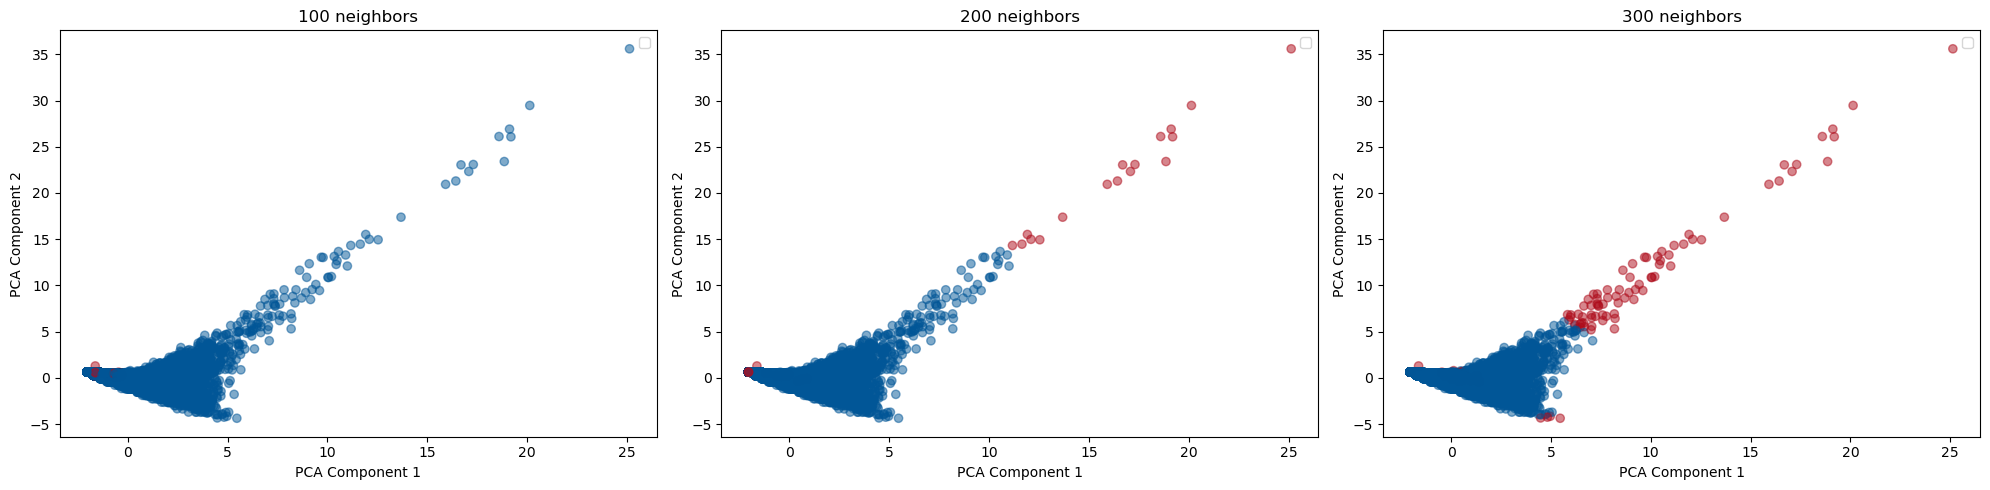

In [594]:
rows = 1 
cols = 3



fig, axes = plt.subplots(rows, 3, figsize=(20, 5))

for i, j in enumerate(range(0, 21, 10)):
    ax = axes[i]  # Corrected from axs to axes
    
#    mask = np.ones(X_pca.shape[0], dtype=bool)
#    mask[indices_out[i]] = False  # Mark outliers as False in the mask
    pca_data['outlier'] = pd.Categorical(y_preds[j])

    ax.scatter(pca_data['PC1'], pca_data['PC2'], alpha = 0.5, c=pca_data['outlier'], cmap=cmap)
    # Inlier points
#    ax.scatter(inliers[:, 0], inliers[:, 1], label='Normal points', alpha=0.5, c='#015697')
    
    # Outlier points
#    ax.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', alpha=0.6, c= '#ae0c1b')

    ax.legend()
    ax.set_title(f'{100+100*i} neighbors')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()
 

In [10]:
from sklearn.manifold import TSNE

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

tsne_data = pd.DataFrame(tsne.fit_transform(X_art), columns=['tSNE1', 'tSNE2'])
tsne_data['outlier'] = pd.Categorical(y_preds[-1])

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 't-SNE of Data with Outliers')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

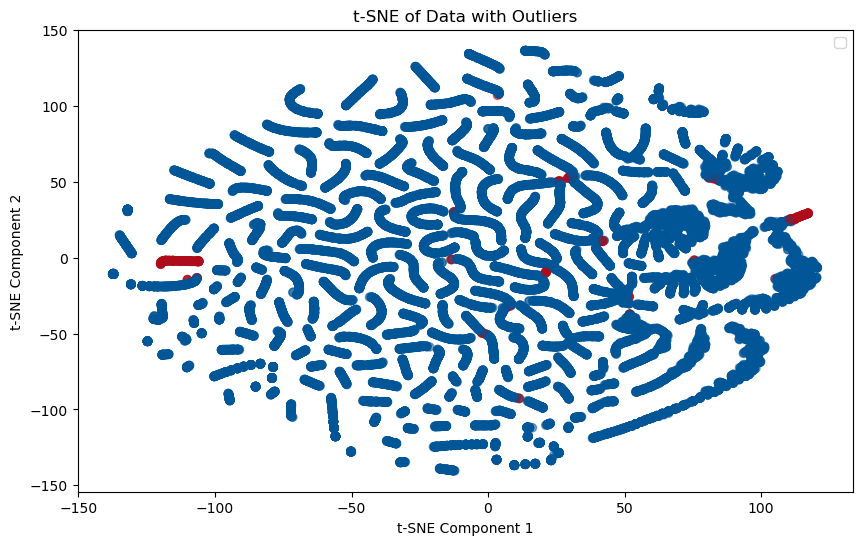

In [599]:
plt.figure(figsize=(10, 6))
 
plt.scatter(tsne_data['tSNE1'], tsne_data['tSNE2'], alpha = 0.5, c=tsne_data['outlier'], cmap=cmap)
 
plt.legend()
plt.title('t-SNE of Data with Outliers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [468]:
df_art.loc[indices_out[0][0]].sort_values(by='followers')

id             name  popularity  followers  \
17845  5Qso37mXXmh1lIUTtcArCs  Bernabe Cantlón        10.0        0.0   
18737  3v53hiwR9LT0crex1kUfFy      Lance Allen        10.0        0.0   
1227   6hnjgzi5upxtDKaypsEmum  Tej Boodardekar         3.0        1.0   
28915  77z8H1FuZXC6iF7xzfADsr      Junko Tsuji         6.0        1.0   
28883  4cQIy9fVIbAqOPkfCdYcOs        Ben Hiura         6.0        1.0   
...                       ...              ...         ...        ...   
18607  6DDCjHWtL6jTl1B5wG8tF6    Zakir Hussain        35.0   625754.0   
27372  5dcOK4stT4JDkP6Dqhbz5s    Sheena Easton        53.0   628338.0   
19037  0Xbdgzdm7k9BJ5gUgmAkpy     Indian Ocean        30.0  1201399.0   
5760   0eGh2jSWPBX5GuqIHoZJZG            ICE-T        45.0  1285733.0   
938    0LyfQWJT6nXafLPZqxe9Of  Various Artists         0.0  2083215.0   

                                                  genres  num_genres  \
17845                                                 []           0   
18737                                                 []           0   
1227                                                  []           0   
28915                                                 []           0   
28883                                                 []           0   
...                                                  ...         ...   
18607  ['filmi', 'hindustani classical', 'hindustani ...           6   
27372  ['mellow gold', 'minneapolis sound', 'new roma...           5   
19037  ['filmi', 'indian folk', 'indian fusion', 'ind...           4   
5760   ['conscious hip hop', 'gangster rap', 'golden ...           8   
938                                                   []           0   

             first_genre  
17845                NaN  
18737                NaN  
1227                 NaN  
28915                NaN  
28883                NaN  
...                  ...  
18607              filmi  
27372        mellow gold  
19037              filmi  
5760   conscious hip hop  
938                  NaN  

[302 rows x 7 columns]

## Isolation Forest

In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [27]:
from pyod.models.iforest import IsolationForest

In [420]:
%%time
clf = IsolationForest()
clf.fit(X_art)
outliers = clf.predict(X_art)

CPU times: user 267 ms, sys: 5.39 ms, total: 272 ms
Wall time: 272 ms


In [39]:
%%time

y_preds_if = []

for k in range(10, 500, 50):
    clf = IsolationForest(n_estimators=k, contamination=0.01)
    y_pred = clf.fit_predict(X_art)
    y_preds_if.append(y_pred)

CPU times: user 7.59 s, sys: 70.1 ms, total: 7.66 s
Wall time: 7.66 s


In [40]:
len(y_preds_if)
list(range(10, 500, 50))

10

[10, 60, 110, 160, 210, 260, 310, 360, 410, 460]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '10 estimators')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '210 estimators')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '410 estimators')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

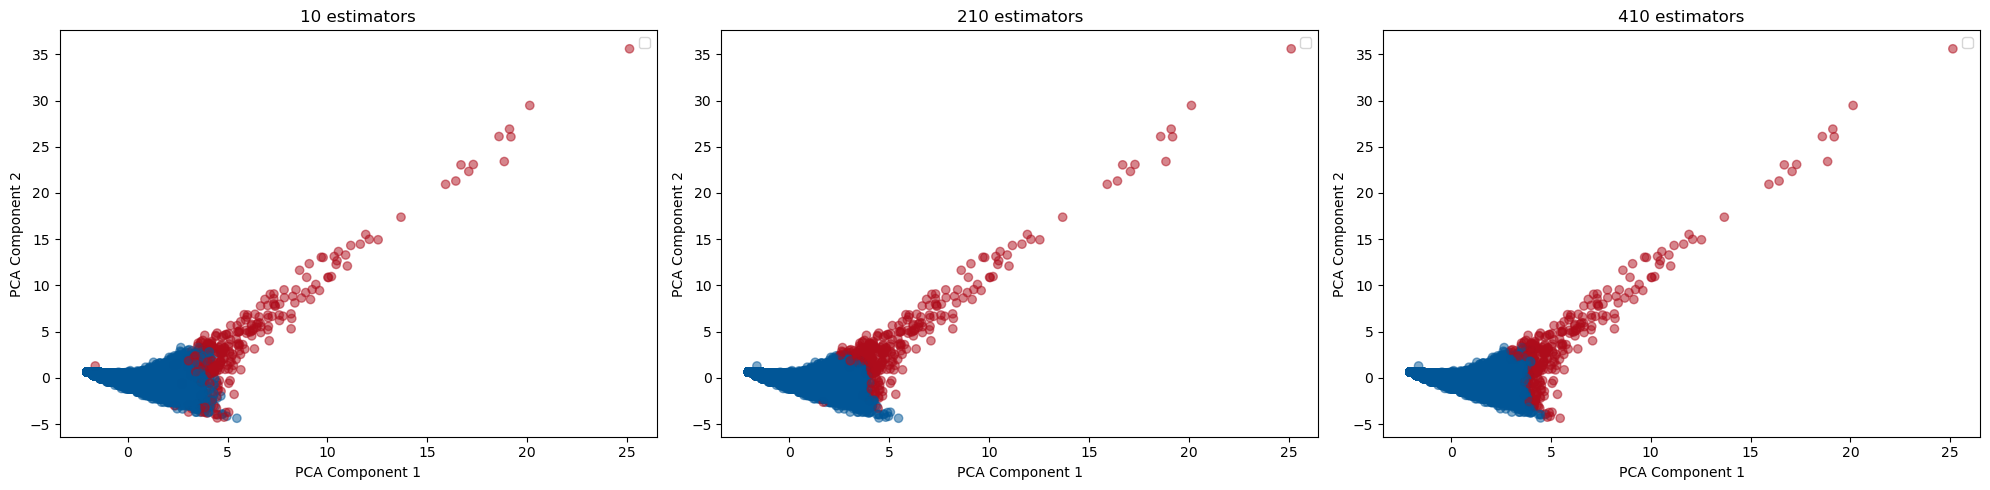

In [41]:
rows = 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 5))

for i, j in enumerate(range(10, 500, 200)):
    ax = axes[i]  # Corrected from axs to axes
    
    pca_data['outlier'] = pd.Categorical(y_preds_if[i])

    ax.scatter(pca_data['PC1'], pca_data['PC2'], alpha = 0.5, c=pca_data['outlier'], cmap=cmap)

    ax.legend()
    ax.set_title(f'{j} estimators')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 't-SNE of Data with Outliers')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

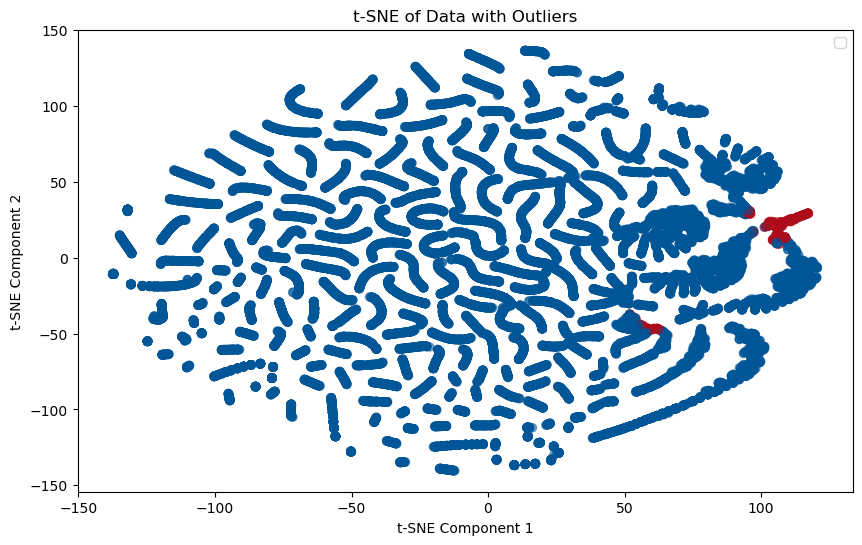

In [42]:
plt.figure(figsize=(10, 6))
 
plt.scatter(tsne_data['tSNE1'], tsne_data['tSNE2'], alpha = 0.5, c=y_preds_if[-2], cmap=cmap)
 
plt.legend()
plt.title('t-SNE of Data with Outliers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [431]:
df_art.loc[indices_out_if[0][0]].sort_values(by='followers')

id             name  popularity    followers  \
938    0LyfQWJT6nXafLPZqxe9Of  Various Artists         0.0    2083215.0   
4483   3ipn9JLAPI5GUEo4y4jcoi         Ludacris        74.0    2639244.0   
3583   3JsMj0DEzyWc0VDlHuy9Bx       Supertramp        68.0    3174632.0   
12132  1IQ2e1buppatiN1bxUVkrk           Slayer        65.0    3593286.0   
8858   7mnBLXK823vNxN3UWB7Gfz   The Black Keys        69.0    3900217.0   
...                       ...              ...         ...          ...   
13062  06HL4z0CvFAxyc27GXpf02     Taylor Swift       100.0   82377431.0   
13045  6qqNVTkY8uBg9cP3Jd7DAH    Billie Eilish        88.0   84331151.0   
3922   4YRxDV8wJFPHPTeXepOstw     Arijit Singh        87.0   85817284.0   
3002   66CXWjxzNUsdJxJ2JdwvnR    Ariana Grande        86.0   92722195.0   
2471   6eUKZXaKkcviH0Ku9w2n3V       Ed Sheeran        87.0  114163489.0   

                                                  genres  num_genres  \
938                                                   []           0   
4483   ['atl hip hop', 'dance pop', 'dirty south rap'...           9   
3583   ['album rock', 'art rock', 'classic rock', 'gl...          10   
12132  ['alternative metal', 'death metal', 'groove m...          10   
8858   ['alternative rock', 'blues rock', 'garage roc...          10   
...                                                  ...         ...   
13062                                            ['pop']           1   
13045                   ['art pop', 'electropop', 'pop']           3   
3922                       ['filmi', 'modern bollywood']           2   
3002                                             ['pop']           1   
2471          ['pop', 'singer-songwriter pop', 'uk pop']           3   

             first_genre  
938                  NaN  
4483         atl hip hop  
3583          album rock  
12132  alternative metal  
8858    alternative rock  
...                  ...  
13062                pop  
13045            art pop  
3922               filmi  
3002                 pop  
2471                 pop  

[302 rows x 7 columns]

# Tracks

## LOF

In [44]:
%%time

#indices_out = []
y_preds_t = []

for k in range(100, 310, 10):
    clf = LocalOutlierFactor(n_neighbors=k, contamination=0.01) # , novelty=True
    y_pred = clf.fit_predict(X_track)
    y_preds_t.append(y_pred)
#    i_out = np.where(y_pred==-1)
#    indices_out.append(i_out)


CPU times: user 35min 36s, sys: 28.5 s, total: 36min 4s
Wall time: 5min 30s


In [566]:
len(y_preds_t)

21

In [47]:
pca = PCA(n_components=2)
pca_data_t = pd.DataFrame(pca.fit_transform(X_track), columns=['PC1', 'PC2'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '100 neighbors')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '200 neighbors')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '300 neighbors')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

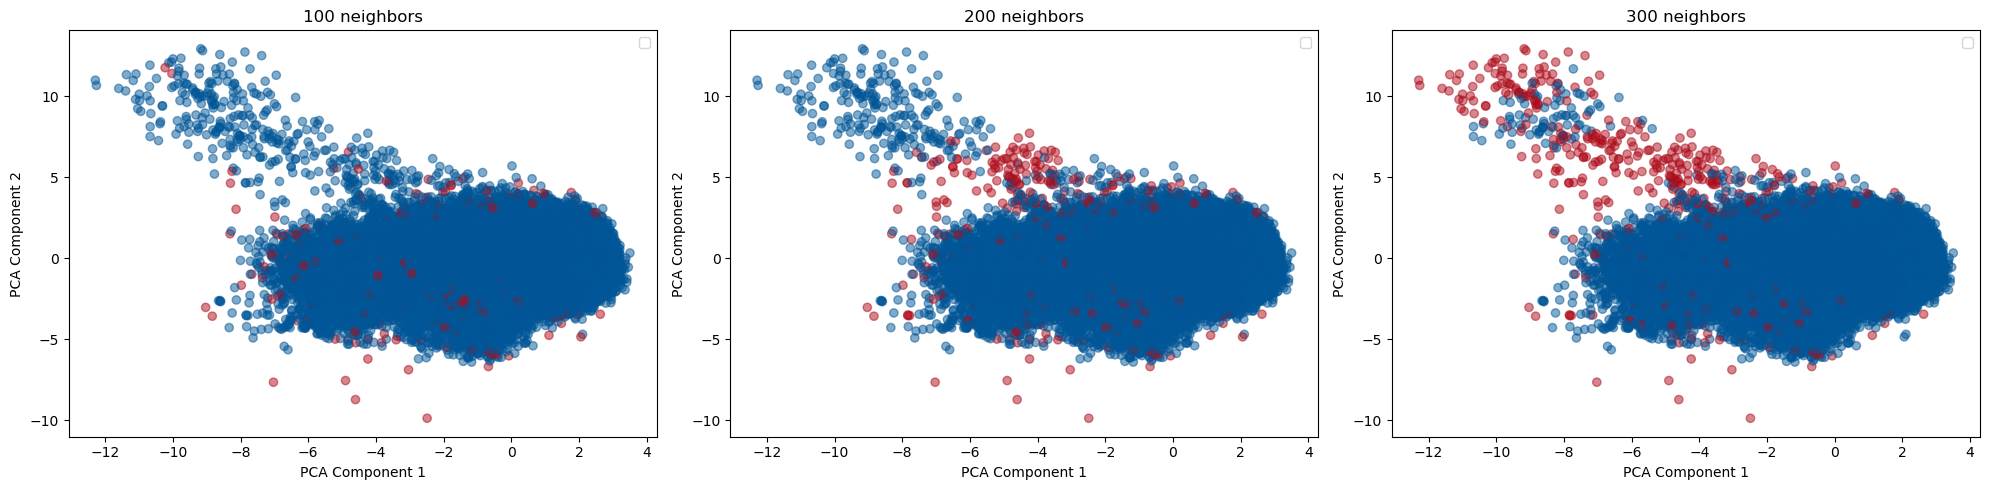

In [48]:
rows = 1 
cols = 3



fig, axes = plt.subplots(rows, 3, figsize=(20, 5))

for i, j in enumerate(range(0, 21, 10)):
    ax = axes[i]  # Corrected from axs to axes
    
#    mask = np.ones(X_pca.shape[0], dtype=bool)
#    mask[indices_out[i]] = False  # Mark outliers as False in the mask
    pca_data_t['outlier'] = pd.Categorical(y_preds_t[j])

    ax.scatter(pca_data_t['PC1'], pca_data_t['PC2'], alpha = 0.5, c=pca_data_t['outlier'], cmap=cmap)
    # Inlier points
#    ax.scatter(inliers[:, 0], inliers[:, 1], label='Normal points', alpha=0.5, c='#015697')
    
    # Outlier points
#    ax.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', alpha=0.6, c= '#ae0c1b')

    ax.legend()
    ax.set_title(f'{100+100*i} neighbors')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()
 

In [49]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

tsne_data_t = pd.DataFrame(tsne.fit_transform(X_track), columns=['tSNE1', 'tSNE2'])
tsne_data_t['outlier'] = pd.Categorical(y_preds_t[-1])

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 't-SNE of Data with Outliers')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

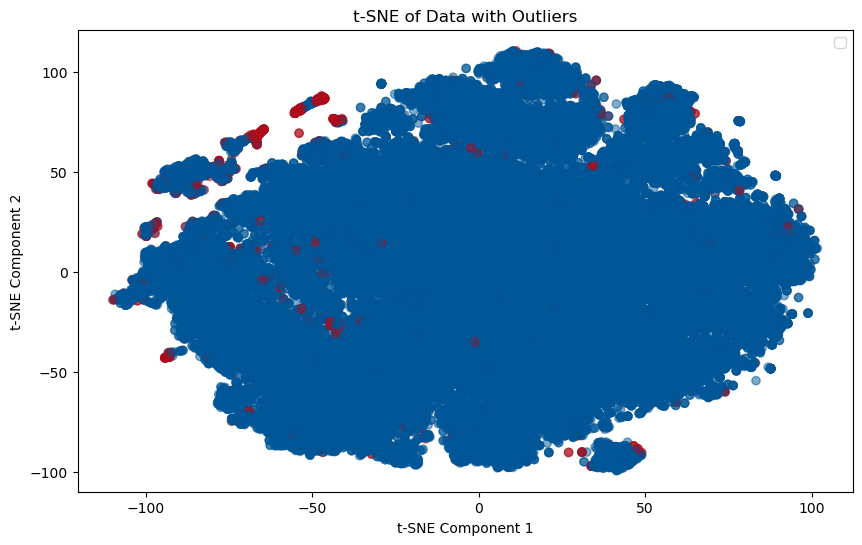

In [50]:
plt.figure(figsize=(10, 6))
 
plt.scatter(tsne_data_t['tSNE1'], tsne_data_t['tSNE2'], alpha = 0.5, c=tsne_data['outlier'], cmap=cmap)
 
plt.legend()
plt.title('t-SNE of Data with Outliers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [468]:
df_art.loc[indices_out[0][0]].sort_values(by='followers')

id             name  popularity  followers  \
17845  5Qso37mXXmh1lIUTtcArCs  Bernabe Cantlón        10.0        0.0   
18737  3v53hiwR9LT0crex1kUfFy      Lance Allen        10.0        0.0   
1227   6hnjgzi5upxtDKaypsEmum  Tej Boodardekar         3.0        1.0   
28915  77z8H1FuZXC6iF7xzfADsr      Junko Tsuji         6.0        1.0   
28883  4cQIy9fVIbAqOPkfCdYcOs        Ben Hiura         6.0        1.0   
...                       ...              ...         ...        ...   
18607  6DDCjHWtL6jTl1B5wG8tF6    Zakir Hussain        35.0   625754.0   
27372  5dcOK4stT4JDkP6Dqhbz5s    Sheena Easton        53.0   628338.0   
19037  0Xbdgzdm7k9BJ5gUgmAkpy     Indian Ocean        30.0  1201399.0   
5760   0eGh2jSWPBX5GuqIHoZJZG            ICE-T        45.0  1285733.0   
938    0LyfQWJT6nXafLPZqxe9Of  Various Artists         0.0  2083215.0   

                                                  genres  num_genres  \
17845                                                 []           0   
18737                                                 []           0   
1227                                                  []           0   
28915                                                 []           0   
28883                                                 []           0   
...                                                  ...         ...   
18607  ['filmi', 'hindustani classical', 'hindustani ...           6   
27372  ['mellow gold', 'minneapolis sound', 'new roma...           5   
19037  ['filmi', 'indian folk', 'indian fusion', 'ind...           4   
5760   ['conscious hip hop', 'gangster rap', 'golden ...           8   
938                                                   []           0   

             first_genre  
17845                NaN  
18737                NaN  
1227                 NaN  
28915                NaN  
28883                NaN  
...                  ...  
18607              filmi  
27372        mellow gold  
19037              filmi  
5760   conscious hip hop  
938                  NaN  

[302 rows x 7 columns]

## Isolation Forest

In [51]:
%%time

y_preds_if_t = []

for k in range(10, 500, 50):
    clf = IsolationForest(n_estimators=k, contamination=0.01)
    y_pred = clf.fit_predict(X_track)
    y_preds_if_t.append(y_pred)

CPU times: user 17.4 s, sys: 193 ms, total: 17.6 s
Wall time: 17.8 s


In [52]:
len(y_preds_if_t)
list(range(10, 500, 50))

10

[10, 60, 110, 160, 210, 260, 310, 360, 410, 460]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '10 estimators')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '210 estimators')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '410 estimators')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

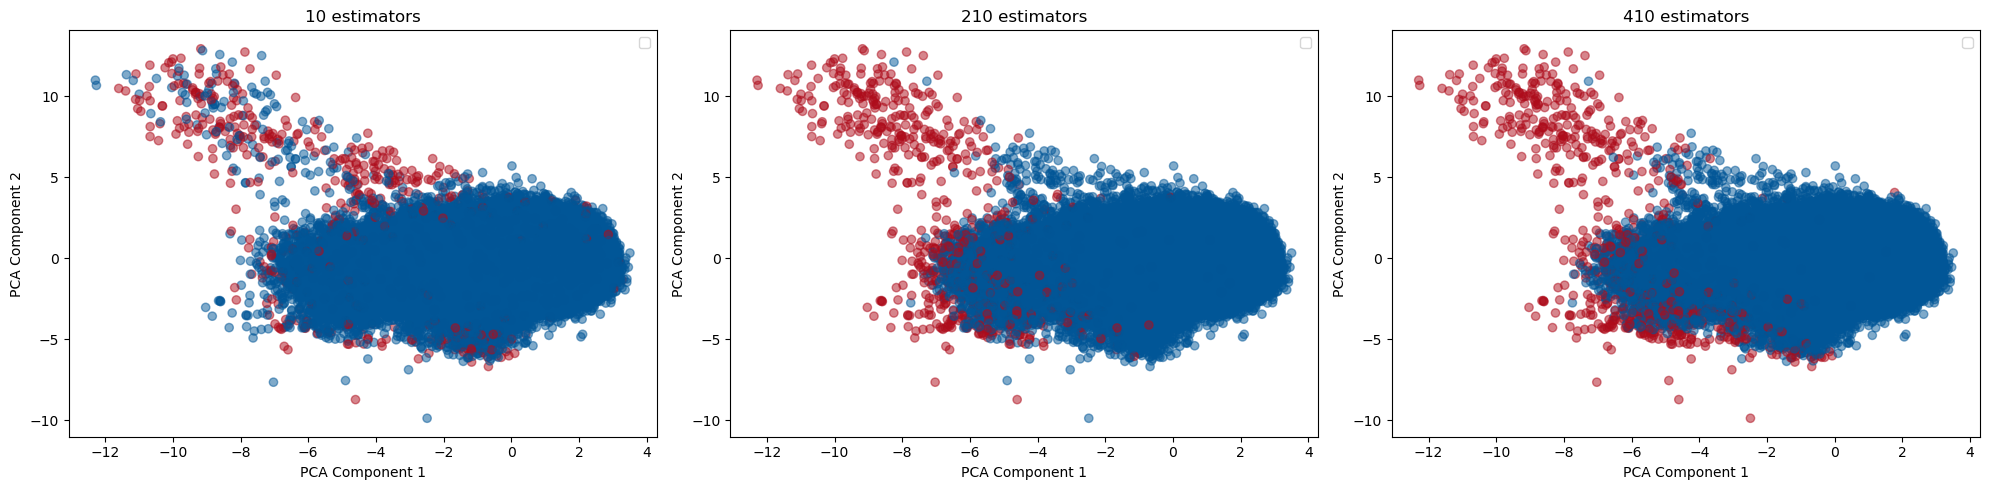

In [53]:
rows = 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 5))

for i, j in enumerate(range(10, 500, 200)):
    ax = axes[i]  # Corrected from axs to axes
    
    pca_data_t['outlier'] = pd.Categorical(y_preds_if_t[i])

    ax.scatter(pca_data_t['PC1'], pca_data_t['PC2'], alpha = 0.5, c=pca_data_t['outlier'], cmap=cmap)

    ax.legend()
    ax.set_title(f'{j} estimators')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 't-SNE of Data with Outliers')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

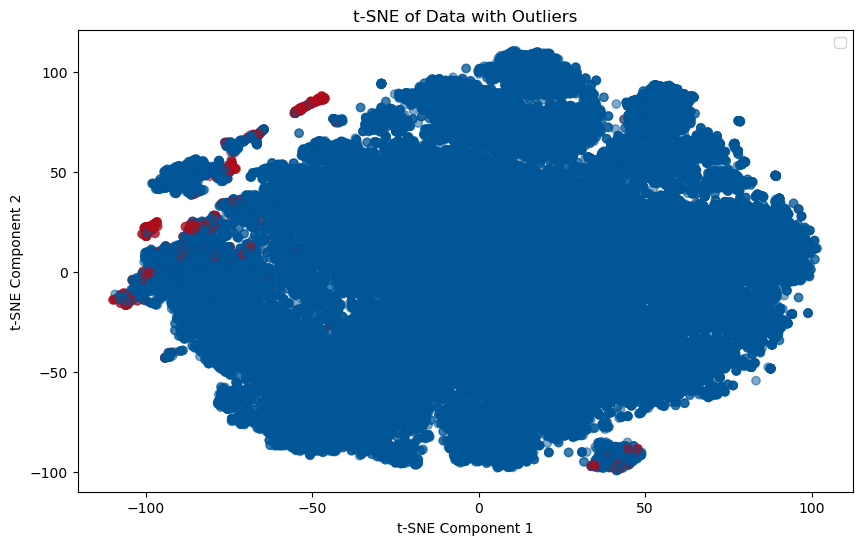

In [55]:
plt.figure(figsize=(10, 6))
 
plt.scatter(tsne_data_t['tSNE1'], tsne_data_t['tSNE2'], alpha = 0.5, c=y_preds_if_t[-1], cmap=cmap)
 
plt.legend()
plt.title('t-SNE of Data with Outliers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## ABOD

### artist

In [40]:
from pyod.models.abod import ABOD

In [210]:
clf = ABOD(contamination=0.01, method='fast', n_neighbors=100)
clf.fit(X_art)

ABOD(contamination=0.01, method='fast', n_neighbors=100)

In [213]:
art_outliers = clf.predict(X_art)
outlier_counts = np.unique(outliers, return_counts=True)

In [218]:
outlier_counts

(array([0, 1]), array([87975,  1585]))

In [220]:
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(X_art), columns=['PC1', 'PC2'])

In [226]:
import matplotlib.colors as clr
cmap = clr.LinearSegmentedColormap.from_list('custom_map', ['#015697', '#ae0c1b'], N=256)

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'PCA of Data with Outliers')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

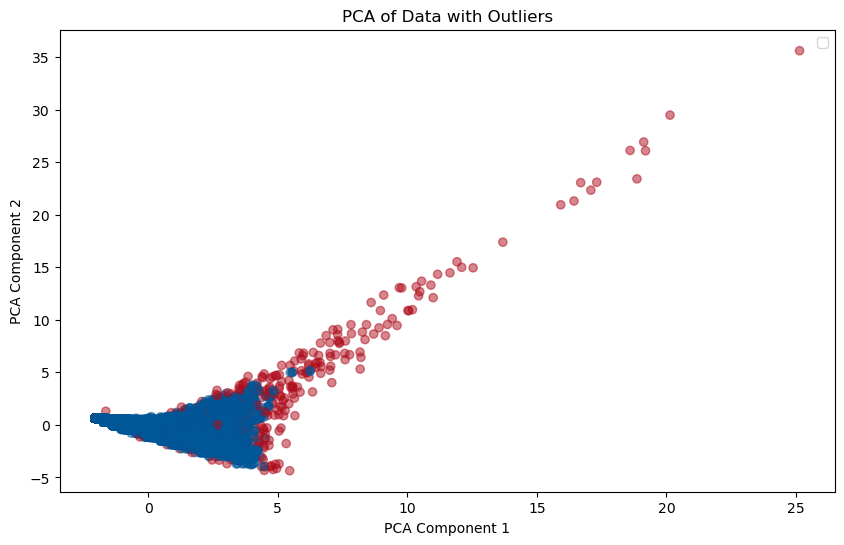

In [228]:
 
plt.figure(figsize=(10, 6))
 
pca_data['outlier'] = pd.Categorical(art_outliers)
 
plt.scatter(pca_data['PC1'], pca_data['PC2'], alpha = 0.5, c=pca_data['outlier'], cmap= cmap)
 
 
plt.legend()
plt.title('PCA of Data with Outliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
 
plt.show()

try n_neighbors = [5,10,50] have the same result ：(array([0]), array([30137]))

### tracks

In [200]:
clf = ABOD(contamination=0.01, method='fast')
clf.fit(X_track)
outliers = clf.predict(X_track)
outlier_counts = np.unique(outliers, return_counts=True)

ABOD(contamination=0.01, method='fast', n_neighbors=5)

In [64]:
outlier_counts

(array([0, 1]), array([87975,  1585]))

In [68]:
total_points = 87975 + 1585
outlier_ratio = 1585 / total_points
outlier_ratio

0.017697632871817776

In [73]:
decision_scores = clf.decision_scores_
abs_decision_scores = np.abs(decision_scores)
n_points = len(X_track)
n_outliers = int(n_points * 0.01)

In [77]:
top_outlier_indices = np.argsort(abs_decision_scores)[-n_outliers:]
outliers = np.zeros(n_points, dtype=bool)
outliers[top_outlier_indices] = True

In [82]:
track_outliers = X_track[outliers]
track_outliers

array([[-0.09738063, -1.46153861,  0.97575163, ..., -0.50520326,
         0.77147733, -0.43498593],
       [-0.09738063, -1.46153861,  0.81302643, ...,  0.02702791,
         0.77147733, -0.43498593],
       [-0.09738063, -1.46153861,  1.62665245, ..., -0.64486271,
         0.77147733, -0.43498593],
       ...,
       [-0.09738063, -1.46153861,  0.65030122, ..., -0.21995833,
         0.77147733, -0.43498593],
       [-0.09738063, -1.46153861, -0.05484133, ..., -0.95112879,
         0.77147733, -0.43498593],
       [-0.09738063, -1.46153861,  0.75878469, ...,  0.34545067,
         0.77147733,  0.70642042]])

In [99]:
outlier_scores = decision_scores[top_outlier_indices]

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   3.,   4., 885.]),
 array([-9.88776228e+05, -9.39340719e+05, -8.89905211e+05, -8.40469703e+05,
        -7.91034195e+05, -7.41598686e+05, -6.92163178e+05, -6.42727670e+05,
        -5.93292162e+05, -5.43856654e+05, -4.94421145e+05, -4.44985637e+05,
        -3.95550129e+05, -3.46114621e+05, -2.96679112e+05, -2.47243604e+05,
        -1.97808096e+05, -1.48372588e+05, -9.89370795e+04, -4.95015713e+04,
        -6.60630267e+01]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram of Decision Scores with Top 1% Threshold')

Text(0.5, 0, 'Decision Score')

Text(0, 0.5, 'Number of Points')

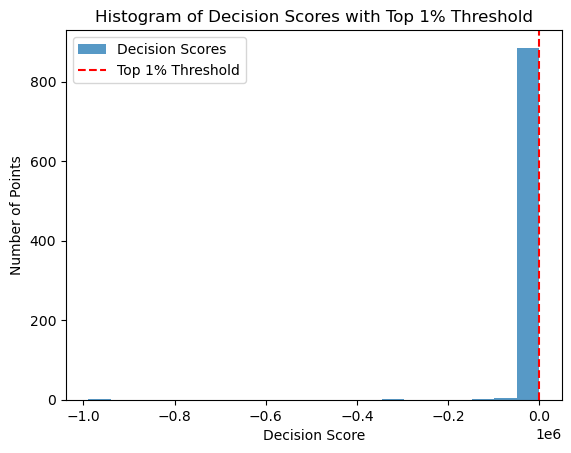

In [101]:
plt.hist(outlier_scores, bins=20,alpha=0.75, label='Decision Scores')

threshold = np.min(abs_decision_scores[top_outlier_indices])
plt.axvline(threshold, color='r', linestyle='--', label='Top 1% Threshold')

plt.title("Histogram of Decision Scores with Top 1% Threshold")
plt.xlabel("Decision Score")
plt.ylabel("Number of Points")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'PCA of Data with Outliers')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

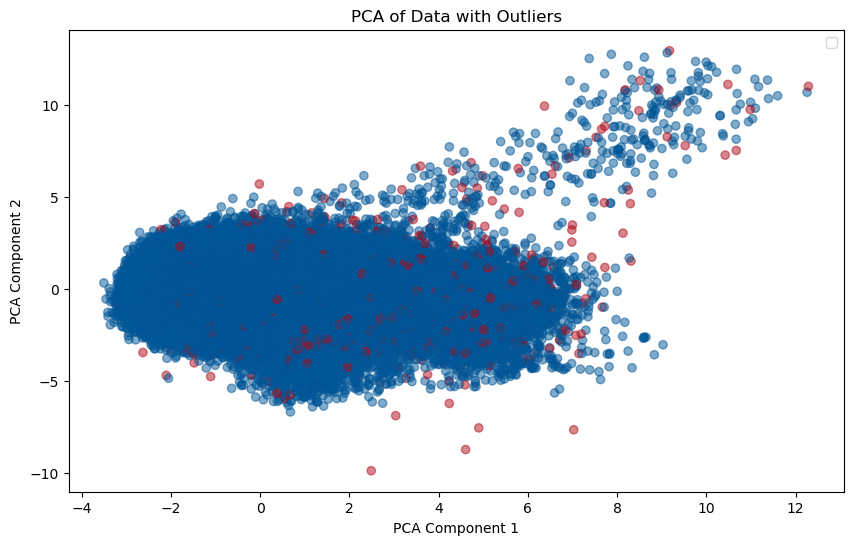

In [230]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data_t = pd.DataFrame(pca.fit_transform(X_track), columns=['PC1', 'PC2'])
 
plt.figure(figsize=(10, 6))
 
pca_data_t['outlier'] = pd.Categorical(outliers)
 
plt.scatter(pca_data_t['PC1'], pca_data_t['PC2'], alpha = 0.5, c=pca_data_t['outlier'], cmap=cmap )
 
 
plt.legend()
plt.title('PCA of Data with Outliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
 
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 't-SNE of Data with Outliers')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

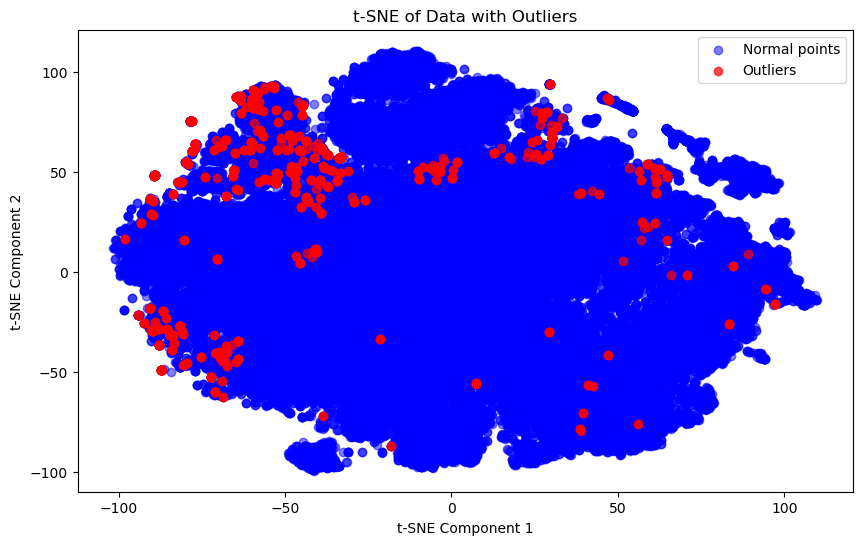

In [111]:
from sklearn.manifold import TSNE

# X is original dataset，outliers is array

tsne = TSNE(n_components=2, random_state=42)

# t-SNE for original dataset
X_tsne = tsne.fit_transform(X_track)

plt.figure(figsize=(10, 6))

# blue for inlier data 
plt.scatter(X_tsne[~outliers, 0], X_tsne[~outliers, 1], label='Normal points', alpha=0.5, c='blue')

# red for outlier data
plt.scatter(X_tsne[outliers, 0], X_tsne[outliers, 1], label='Outliers', alpha=0.7, c='red')

plt.legend()
plt.title('t-SNE of Data with Outliers')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/Users/yian/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/yian/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'IsoMap of Sampled Data with Outliers')

Text(0.5, 0, 'IsoMap Component 1')

Text(0, 0.5, 'IsoMap Component 2')

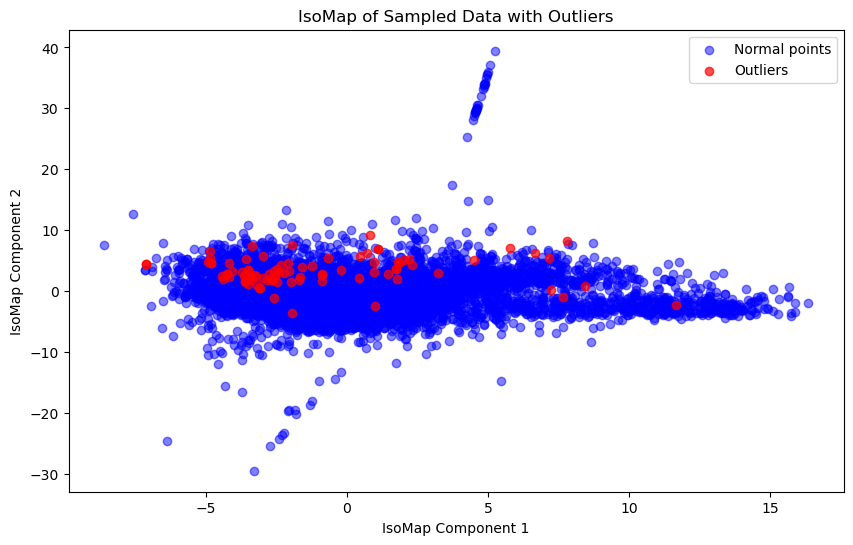

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import Isomap

# sample dataset and outlier set
X_sample, _, outliers_sample, _ = train_test_split(X_track, outliers, test_size=0.9, random_state=42, stratify=outliers)

# use IsoMap 
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_sample)

# visualize
plt.figure(figsize=(10, 6))

# inlier point
plt.scatter(X_isomap[~outliers_sample, 0], X_isomap[~outliers_sample, 1], label='Normal points', alpha=0.5, c='blue')

# outlier point
plt.scatter(X_isomap[outliers_sample, 0], X_isomap[outliers_sample, 1], label='Outliers', alpha=0.7, c='red')

plt.legend()
plt.title('IsoMap of Sampled Data with Outliers')
plt.xlabel('IsoMap Component 1')
plt.ylabel('IsoMap Component 2')
plt.show()

# merged

### feature selection

In [335]:
df = df_final.copy()

In [118]:
df['popularity_track'].quantile(q=0.33)
df['popularity_track'].quantile(q=0.66)

21.0

42.0

In [120]:
def transf_pop(x):
    if x <= 21: return 0
    elif x <= 42: return 1
    return 2

In [336]:
def transf_pop(x):
    if x < 30: return 0
    return 1

In [337]:
df['popularity_track'] = df['popularity_track'].apply(lambda x: transf_pop(x))
df

id  \
0      0000vdREvCVMxbQTkS888c   
1      000CC8EParg64OmTxVnZ0p   
2      01hzSkNrbt10n7GaEulntu   
3      04ugzFDYcsvp9ssHo0L2QQ   
4      05wRpBHnbs5xsz8UhRZz3x   
...                       ...   
88147  7ztCi9k76A4QmSqWEutFyV   
88148  7ztesPnVwqssLMsXlmbvwG   
88149  7zubR9uYAWjb5KPZTMm85e   
88150  7zx2Nb2BTMOFelkvb4nNPB   
88151  7zxHiMmVLt4LGWpOMqOpUh   

                                                    name  disc_number  \
0                                                  Lolly            1   
1      It's All Coming Back To Me Now (Glee Cast Vers...            1   
2                    Everybody Talks (Glee Cast Version)            1   
3                   A Thousand Years (Glee Cast Version)            1   
4                                           Safety Dance            1   
...                                                  ...          ...   
88147                 Radha (From "Jab Harry Met Sejal")            1   
88148                                 Soul Samba Express            1   
88149                                           Ley Seca            1   
88150                                 This Is Who We Are            1   
88151        Aethu Kari Raavilum - From "Bangalore Days"            1   

       explicit  popularity_track  track_number  \
0             1                 1             1   
1             0                 1            10   
2             0                 1             7   
3             0                 1            41   
4             0                 0            22   
...         ...               ...           ...   
88147         0                 1             1   
88148         0                 0            10   
88149         0                 0            22   
88150         0                 1             9   
88151         0                 1             1   

                                    artists   album_type  \
0                                      Rill       single   
1                                 Glee Cast        album   
2                                 Glee Cast        album   
3                                 Glee Cast  compilation   
4                                 Glee Cast        album   
...                                     ...          ...   
88147  Pritam,Shahid Mallya,Sunidhi Chauhan       single   
88148           Ron Trent,Anthony Nicholson        album   
88149                       Jhayco,Anuel AA  compilation   
88150                      Dash Berlin,Syzz        album   
88151                Haricharan,Gopi Sundar        album   

                                              album_name  album_total_tracks  \
0                                                  Lolly                   1   
1                                        Glee Love Songs                 100   
2                     Glee: The Music, Season 4 Volume 1                  16   
3              Glee: The Music, The Complete Season Four                 106   
4      Glee The 3D Concert Movie (Motion Picture Soun...                  23   
...                                                  ...                 ...   
88147                 Radha (From "Jab Harry Met Sejal")                   1   
88148                                Word, Sound & Power                  24   
88149                             El perreo es el futuro                  31   
88150                                    We Are (Part 2)                  10   
88151                                     Bangalore Days                   7   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.910   0.374    8    -9.844     0       0.1990      0.075700   
1             0.269   0.516    0    -7.361     1       0.0366      0.406000   
2             0.495   0.891    4    -4.266     1       0.0383      0.000186   
3             0.409   0.350   10    -8.025     1       0.0275      0.750000   
4             0.609   0.947    8    -5.823     0       0.2340  

In [84]:
correlation_spearman = df.corr()
correlation_spearman

disc_number  explicit  popularity_track  \
disc_number                   1.000000 -0.021667         -0.038210   
explicit                     -0.021667  1.000000          0.010091   
popularity_track             -0.038210  0.010091          1.000000   
track_number                  0.001878 -0.031978         -0.177891   
album_total_tracks            0.223400 -0.044306         -0.206138   
danceability                 -0.022744  0.119187          0.068165   
energy                       -0.052285  0.101979         -0.003460   
key                          -0.013427  0.007903          0.007070   
loudness                     -0.035824  0.110368          0.061575   
mode                          0.020767 -0.033672         -0.008752   
speechiness                  -0.019213  0.327538         -0.094214   
acousticness                  0.060347 -0.093112         -0.019442   
instrumentalness             -0.014647 -0.111941         -0.132507   
liveness                      0.018164  0.042577         -0.009351   
valence                       0.002739 -0.001132          0.012287   
tempo                        -0.003688 -0.003861          0.001476   
time_signature               -0.015414  0.036768          0.028333   
start_of_fade_out            -0.010885 -0.068714         -0.004443   
tempo_confidence             -0.019805 -0.036718          0.016875   
time_signature_confidence    -0.024396 -0.003425          0.118100   
key_confidence                0.024738 -0.071649          0.025260   
mode_confidence               0.015388 -0.100990          0.074604   
n_beats                      -0.009333 -0.066715         -0.004170   
n_bars                       -0.008181 -0.068646         -0.010250   
num_genres_track             -0.019580 -0.003146          0.048209   
duration_min                 -0.011445 -0.071855         -0.003688   
features_duration_min        -0.011438 -0.071966         -0.003661   
album_release_year           -0.062037  0.098417         -0.059206   
num_artists                   0.013933  0.029510          0.018677   
popularity_art                0.012008  0.054480          0.364691   
followers                    -0.004924  0.050672          0.114624   
num_genres_art                0.024900  0.002136          0.006851   

                           track_number  album_total_tracks  danceability  \
disc_number                    0.001878            0.223400     -0.022744   
explicit                      -0.031978           -0.044306      0.119187   
popularity_track              -0.177891           -0.206138      0.068165   
track_number                   1.000000            0.794516     -0.064261   
album_total_tracks             0.794516            1.000000     -0.077696   
danceability                  -0.064261           -0.077696      1.000000   
energy                        -0.123042           -0.143377      0.143878   
key                           -0.010152           -0.020124      0.036354   
loudness                      -0.125998           -0.149536      0.269008   
mode                           0.043680            0.059174     -0.062286   
speechiness                   -0.024146           -0.037370      0.108615   
acousticness                   0.119465            0.150030     -0.176743   
instrumentalness               0.034925            0.033399     -0.193564   
liveness                      -0.001187            0.008295     -0.130131   
valence                        0.020400            0.047406      0.492394   
tempo                         -0.030123           -0.035010     -0.023032   
time_signature                -0.042892           -0.054239      0.209151   
start_of_fade_out             -0.084133           -0.124579     -0.068877   
tempo_confidence              -0.059840           -0.061580      0.472201   
time_signature_confidence     -0.055868           -0.066038      0.378249   
key_confidence                 0.025013            0.038122     -0.030802   
mode_confidence       

<Figure size 2500x1500 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation_spearman Matrix Heatmap')

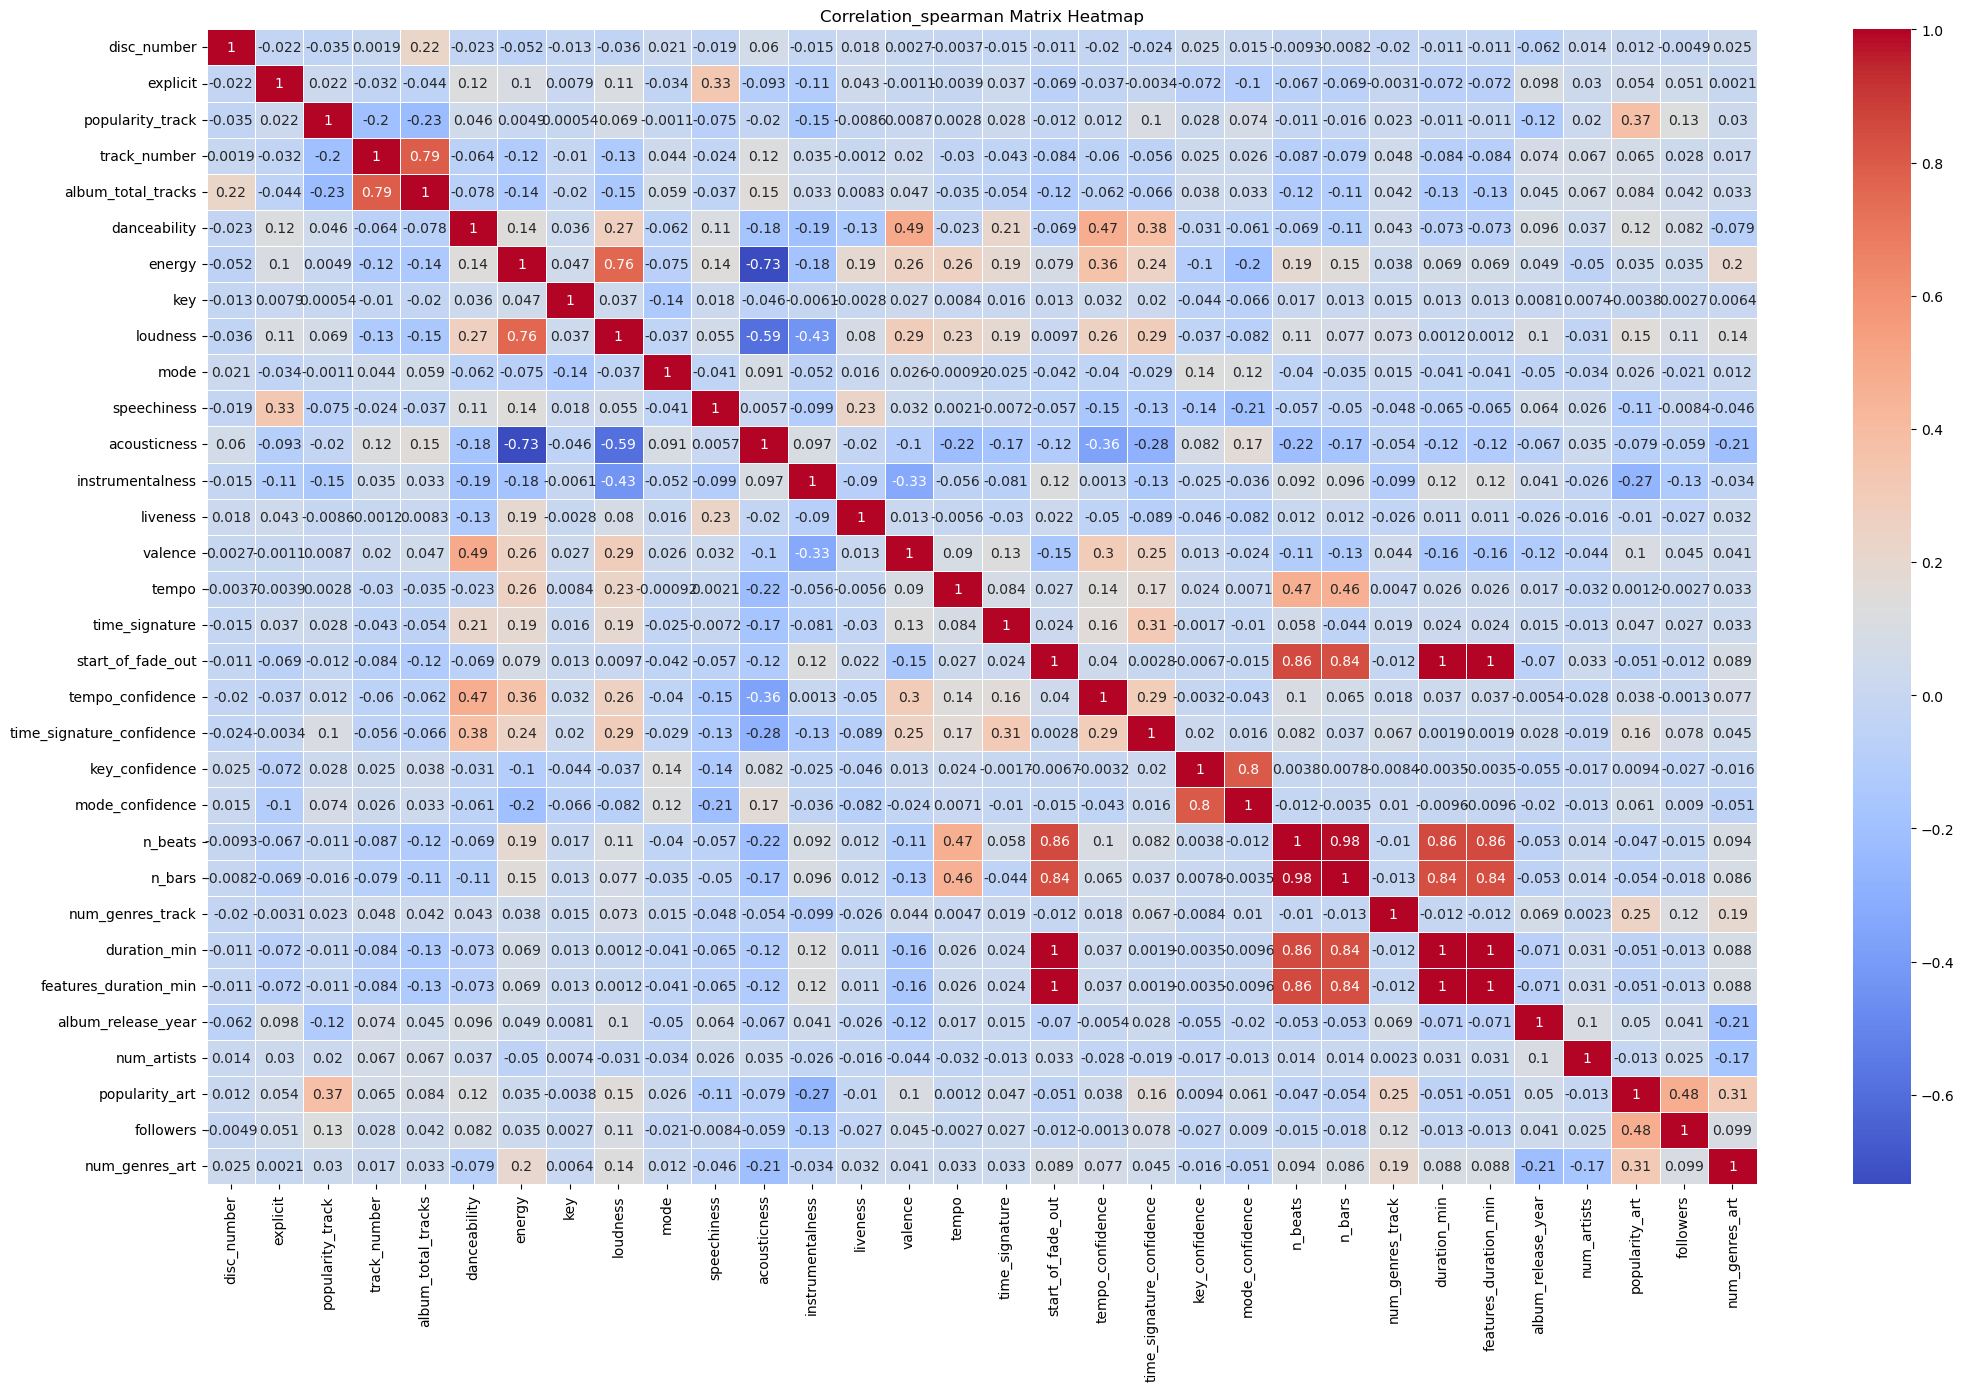

In [71]:
# make heatmap
plt.figure(figsize=(25, 15))  
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_spearman Matrix Heatmap')
plt.show()

In [338]:
y = df['popularity_track']

In [128]:
df.columns

Index(['id', 'name', 'disc_number', 'explicit', 'popularity_track',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'start_of_fade_out',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_beats', 'n_bars', 'genres', 'num_genres_track',
       'genre', 'duration_min', 'features_duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art'],
      dtype='object')

In [339]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['album_type'] = le.fit_transform(df['album_type'])
df['genre'] = le.fit_transform(df['genre'])
df_cl = df[['disc_number', 'explicit', 
       'track_number',  'album_type', 
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'num_genres_track',
       'genre', 'duration_min','album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art']]

In [132]:
X = std_scl(df_cl)

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [110]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
def eval(clf, X_test, y_train, y_test):
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_test_pred))

    clf.score(X_test, y_test)

    print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
    print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
    print()

    print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
    print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

    print('---------------------------------------------------------------')
    print(classification_report(y_test, y_test_pred))
    
eval(dt,X_test, y_train, y_test)

Accuracy: 0.6528775618240944
Train Accuracy 0.9995624412536869
Train F1-score [0.99952656 0.9994589  0.99970378]

Test Accuracy 0.6528775618240944
Test F1-score [0.7302945  0.55353535 0.66990348]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      9212
           1       0.55      0.56      0.55      8634
           2       0.67      0.67      0.67      8600

    accuracy                           0.65     26446
   macro avg       0.65      0.65      0.65     26446
weighted avg       0.65      0.65      0.65     26446



In [91]:
eval(dt,X_test, y_train, y_test)

Accuracy: 0.7806095439764047
Train Accuracy 0.9997731176870969
Train F1-score [0.99977692 0.99976918]

Test Accuracy 0.7806095439764047
Test F1-score [0.78637703 0.774522  ]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.79      0.79     13542
           1       0.78      0.77      0.77     12904

    accuracy                           0.78     26446
   macro avg       0.78      0.78      0.78     26446
weighted avg       0.78      0.78      0.78     26446



In [93]:
from sklearn.model_selection import StratifiedShuffleSplit
# Define the fraction of rows you want to sample, e.g., 20% (0.2)
sample_fraction = 0.2

# Perform stratified sampling
stratified_sample = df.sample(frac=sample_fraction, random_state=42)

In [98]:
le = LabelEncoder()
stratified_sample['album_type'] = le.fit_transform(stratified_sample['album_type'])
stratified_sample['genre'] = le.fit_transform(stratified_sample['genre'])
sampled_cl = stratified_sample[['disc_number', 'explicit', 
       'track_number',  'album_type', 
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'num_genres_track',
       'genre', 'duration_min','album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art']]

In [101]:
y_sampled = stratified_sample['popularity_track']

In [100]:
X_sampled = std_scl(sampled_cl)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=0)

In [111]:
eval(dt,X_test, y_train, y_test)

Accuracy: 0.7458876914350538
Train Accuracy 0.9999189692893606
Train F1-score [0.99992067 0.9999172 ]

Test Accuracy 0.7458876914350538
Test F1-score [0.74962742 0.74203455]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2643
           1       0.75      0.73      0.74      2646

    accuracy                           0.75      5289
   macro avg       0.75      0.75      0.75      5289
weighted avg       0.75      0.75      0.75      5289



In [104]:
%%time
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

default_depth = dt.get_depth()
param_list = {
    'max_depth': list(np.arange(5, default_depth)),
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

# default: clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

CPU times: user 23.7 s, sys: 4.25 s, total: 27.9 s
Wall time: 5min 17s


In [105]:
clf

DecisionTreeClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100)

In [289]:
df_track_cl.columns

Index(['disc_number', 'explicit', 'track_number', 'album_type',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'num_genres', 'duration_min', 'album_release_year', 'num_artists',
       'genre'],
      dtype='object')

In [112]:
dt = DecisionTreeClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100)

In [113]:
eval(dt,X_test, y_train, y_test)

Accuracy: 0.7931556059746644
Train Accuracy 0.8210031601977149
Train F1-score [0.82275536 0.81921598]

Test Accuracy 0.7931556059746644
Test F1-score [0.79225218 0.7940512 ]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2643
           1       0.79      0.80      0.79      2646

    accuracy                           0.79      5289
   macro avg       0.79      0.79      0.79      5289
weighted avg       0.79      0.79      0.79      5289



In [114]:
dt.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 4.07676468e-02, 1.40778226e-02,
       2.86341649e-01, 8.97366227e-03, 7.71293438e-03, 1.25708296e-04,
       3.34869070e-03, 0.00000000e+00, 6.71079801e-03, 2.45608670e-02,
       1.29162009e-02, 4.22833149e-03, 7.34484520e-03, 2.39537045e-03,
       0.00000000e+00, 4.91389294e-03, 9.24550617e-04, 9.67292258e-04,
       3.88247694e-03, 1.07948471e-02, 5.57425066e-02, 4.62405688e-03,
       9.39870378e-02, 1.01053312e-03, 3.05529668e-01, 7.76043247e-02,
       2.05142856e-02])

In [115]:
zipped = zip(df_track_cl.columns, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

popularity_art 0.3055296679846425
album_total_tracks 0.2863416492442837
album_release_year 0.09398703779575222
followers 0.07760432474219894
genre 0.05574250656393167
track_number 0.04076764683315833
acousticness 0.024560867025306705
num_genres_art 0.0205142855887598
album_type 0.01407782262882176
instrumentalness 0.012916200918418615
num_genres_track 0.010794847115946393
danceability 0.008973662270734737
energy 0.007712934381539467
valence 0.00734484519520823
speechiness 0.006710798013465932
tempo_confidence 0.004913892941938445
duration_min 0.004624056880566437
liveness 0.00422833148694158
mode_confidence 0.0038824769409622913
loudness 0.003348690704333944
tempo 0.002395370448307108
num_artists 0.001010533123220547
key_confidence 0.0009672922582485274
time_signature_confidence 0.0009245506168538507
key 0.0001257082964581988
disc_number 0.0
explicit 0.0
mode 0.0
time_signature 0.0


In [303]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(DecisionTreeClassifier(max_depth=14, min_samples_leaf=20, min_samples_split=100), threshold=0.001)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(12538, 22)

In [118]:
df_cl

disc_number  explicit  track_number  album_type  album_total_tracks  \
0                1         1             1           2                   1   
1                1         0            10           0                 100   
2                1         0             7           0                  16   
3                1         0            41           1                 106   
4                1         0            22           0                  23   
...            ...       ...           ...         ...                 ...   
88147            1         0             1           2                   1   
88148            1         0            10           0                  24   
88149            1         0            22           1                  31   
88150            1         0             9           0                  10   
88151            1         0             1           0                   7   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.910   0.374    8    -9.844     0       0.1990      0.075700   
1             0.269   0.516    0    -7.361     1       0.0366      0.406000   
2             0.495   0.891    4    -4.266     1       0.0383      0.000186   
3             0.409   0.350   10    -8.025     1       0.0275      0.750000   
4             0.609   0.947    8    -5.823     0       0.2340      0.038900   
...             ...     ...  ...       ...   ...          ...           ...   
88147         0.693   0.896    7    -4.114     1       0.0682      0.310000   
88148         0.712   0.976    1    -7.570     1       0.0964      0.005040   
88149         0.759   0.843    8    -3.718     1       0.0913      0.127000   
88150         0.529   0.704    5    -2.691     0       0.0411      0.004860   
88151         0.766   0.382    7   -11.464     0       0.0324      0.698000   

       instrumentalness  liveness  valence    tempo  time_signature  \
0               0.00301     0.154    0.432  104.042               4   
1               0.00000     0.117    0.341  178.174               4   
2               0.00000     0.475    0.735  155.075               4   
3               0.00000     0.114    0.126  139.876               3   
4               0.00000     0.956    0.177  105.012               4   
...                 ...       ...      ...      ...             ...   
88147           0.00000     0.195    0.854  126.995               4   
88148           0.95700     0.225    0.101  121.988               4   
88149           0.00000     0.114    0.560  105.016               4   
88150           0.00000     0.646    0.267  124.228               4   
88151           0.00143     0.157    0.672  119.992               4   

       tempo_confidence  time_signature_confidence  key_confidence  \
0                 0.578                      1.000           0.685   
1                 0.030                      0.659           0.712   
2                 0.233                      0.987           0.426   
3                 0.250                      0.870           0.593   
4                 0.803                      1.000           0.033   
...                 ...                        ...             ...   
88147             0.883                      0.982           0.684   
88148             0.822                      1.000           0.660   
88149             0.659                      0.870           0.478   
88150             0.492                      0.863           0.471   
88151             0.736                      1.000           0.504   

       mode_confidence  num_genres_track  genre  duration_min  \
0                0.583                 1     39      2.678750   
1                0.717                 1     17      5.382217   
2                0.452                 1     17      2.988000   
3                0.693                 1     17      5.113100   
4                0.124                 1     17      2.577100   
...                ...               

In [119]:
df_cl = df_cl.drop(columns = ['key_confidence', 'time_signature_confidence', 'key', 'disc_number', 'explicit', 'mode', 'time_signature'])

In [121]:
df_cl.shape

(88152, 22)

In [122]:
X = std_scl(df_cl)

In [128]:
y = df_final['popularity_track'].apply(lambda x: transf_pop(x))

In [130]:
X.shape, y.shape

((88152, 22), (88152,))

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [132]:
dt = DecisionTreeClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100)

In [133]:
eval(dt,X_test, y_train, y_test)

Accuracy: 0.8192543295772517
Train Accuracy 0.8407772339804881
Train F1-score [0.84162167 0.83992375]

Test Accuracy 0.8192543295772517
Test F1-score [0.82144191 0.81701248]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     13542
           1       0.81      0.83      0.82     12904

    accuracy                           0.82     26446
   macro avg       0.82      0.82      0.82     26446
weighted avg       0.82      0.82      0.82     26446



In [ ]:
dt = DecisionTreeClassifier(max_depth=29, min_samples_leaf=40, min_samples_split=100)
dt.fit(X_train, y_train)

eval(dt,X_test, y_train, y_test)

In [137]:
df_cl['popularity_track'] = df_final['popularity_track']
df_cl

track_number  album_type  album_total_tracks  danceability  energy  \
0                 1           2                   1         0.910   0.374   
1                10           0                 100         0.269   0.516   
2                 7           0                  16         0.495   0.891   
3                41           1                 106         0.409   0.350   
4                22           0                  23         0.609   0.947   
...             ...         ...                 ...           ...     ...   
88147             1           2                   1         0.693   0.896   
88148            10           0                  24         0.712   0.976   
88149            22           1                  31         0.759   0.843   
88150             9           0                  10         0.529   0.704   
88151             1           0                   7         0.766   0.382   

       loudness  speechiness  acousticness  instrumentalness  liveness  \
0        -9.844       0.1990      0.075700           0.00301     0.154   
1        -7.361       0.0366      0.406000           0.00000     0.117   
2        -4.266       0.0383      0.000186           0.00000     0.475   
3        -8.025       0.0275      0.750000           0.00000     0.114   
4        -5.823       0.2340      0.038900           0.00000     0.956   
...         ...          ...           ...               ...       ...   
88147    -4.114       0.0682      0.310000           0.00000     0.195   
88148    -7.570       0.0964      0.005040           0.95700     0.225   
88149    -3.718       0.0913      0.127000           0.00000     0.114   
88150    -2.691       0.0411      0.004860           0.00000     0.646   
88151   -11.464       0.0324      0.698000           0.00143     0.157   

       valence    tempo  tempo_confidence  mode_confidence  num_genres_track  \
0        0.432  104.042             0.578            0.583                 1   
1        0.341  178.174             0.030            0.717                 1   
2        0.735  155.075             0.233            0.452                 1   
3        0.126  139.876             0.250            0.693                 1   
4        0.177  105.012             0.803            0.124                 1   
...        ...      ...               ...              ...               ...   
88147    0.854  126.995             0.883            0.894                 1   
88148    0.101  121.988             0.822            0.447                 1   
88149    0.560  105.016             0.659            0.676                 4   
88150    0.267  124.228             0.492            0.482                 1   
88151    0.672  119.992             0.736            0.547                 1   

       genre  duration_min  album_release_year  num_artists  popularity_art  \
0         39      2.678750                2022            1       45.000000   
1         17      5.382217                2021            1       67.000000   
2         17      2.988000                2012            1       67.000000   
3         17      5.113100                2014            1       67.000000   
4         17      2.577100                2011            1       67.000000   
...      ...           ...                 ...          ...             ...   
88147     55      5.031483                2017            3       71.333333   
88148     13     11.032533                2017            2       18.500000   
88149     68      4.394433                2022            2       84.000000   
88150    110      3.109783                2017            2       54.500000   
88151     81      5.419267                2014            2       63.500000   

          followers  num_genres_art  popularity_track  
0      1.682600e+04        0.000000              35.0  
1      1.517867e+06        2.000000              49.0  
2      1.517867e+06        2.000000              48.0  
3      1.517867e+06        2.000000              35.0  
4  

In [397]:
df_final = df_final[['track_number', 'album_type', 'album_total_tracks', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'tempo_confidence', 'mode_confidence',
       'num_genres_track', 'genre', 'duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art',
       'popularity_track']]

In [138]:
df_cl.to_csv('reduced_merged.csv', index = False)

In [139]:
df_cl.columns

Index(['track_number', 'album_type', 'album_total_tracks', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'tempo_confidence', 'mode_confidence',
       'num_genres_track', 'genre', 'duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art',
       'popularity_track'],
      dtype='object')

In [8]:
df_final = pd.read_csv('reduced_merged.csv')

In [12]:
final_num = df_final[['track_number', 'album_total_tracks', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'tempo_confidence', 'mode_confidence',
       'num_genres_track', 'duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art',
       'popularity_track']]

In [12]:
X_final = std_scl(df_final)

# Merged

## LOF

In [143]:
print(list(range(100, 300, 20)))

[100, 120, 140, 160, 180, 200, 220, 240, 260, 280]


In [144]:
%%time

#indices_out = []
y_preds_f = []

for k in range(100, 300, 20):
    clf = LocalOutlierFactor(n_neighbors=k, contamination=0.01) # , novelty=True
    y_pred = clf.fit_predict(X_final)
    y_preds_f.append(y_pred)
#    i_out = np.where(y_pred==-1)
#    indices_out.append(i_out)


CPU times: user 18min 12s, sys: 17.3 s, total: 18min 29s
Wall time: 3min 21s


In [148]:
len(y_preds_f)

21

In [14]:
pca = PCA(n_components=2)
pca_data_f = pd.DataFrame(pca.fit_transform(X_final), columns=['PC1', 'PC2'])

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

tsne_data_f = pd.DataFrame(tsne.fit_transform(X_final), columns=['tSNE1', 'tSNE2'])
#tsne_data_f['outlier'] = pd.Categorical(y_preds_f[-1])

KeyboardInterrupt: 

In [ ]:
rows = 2
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(30, 8))

for i,j in enumerate(y_preds_f):
    
    ax = axes[i // cols, i % cols]

    tsne_data_f['outlier'] = pd.Categorical(j)
    ax.scatter(data=tsne_data_f, x='tSNE1', y='tSNE2', c='#015697', alpha=0.5)
    ax.scatter(data=tsne_data_f[tsne_data_f['outlier'] == -1], x='tSNE1', y='tSNE2', c='#ae0c1b', alpha=0.5, lw=2)
 #   ax.scatter(pca_data_f['PC1'], pca_data_f['PC2'], alpha = 0.5, c=y_preds[i], cmap=cmap)

  #  a.legend()
    ax.set_title(f'{10+20*i} estimators')
    ax.set_xlabel('tSNE1')
    ax.set_ylabel('tSNE2')

plt.tight_layout()
plt.show()

In [13]:
def plot_outlier_lof(X, y_preds, ranges, method='pca', rows=1, cols=3, figsize=(30, 8)):
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, j in enumerate(ranges):
        if rows>1: ax = axes[i // cols, i % cols]
        else: ax = axes[i]  # Corrected from axs to axes

        X['outlier'] = pd.Categorical(y_preds_if_f[i])

      #  ax.scatter(pca_data_f['PC1'], pca_data_f['PC2'], alpha = 0.5, c=pca_data_f['outlier'], cmap=cmap)
        if method=='pca':

            ax.scatter(data=X, x='PC1', y='PC2', c='#015697', alpha=0.5)
            ax.scatter(data=X[X['outlier'] == -1], x='PC1', y='PC2', c='#ae0c1b', alpha=0.5, lw=2)


            ax.set_title(f'{100+20*j} neighbors')
            ax.set_xlabel('PCA Component 1')
            ax.set_ylabel('PCA Component 2')
        else:
            ax.scatter(data=X, x='tSNE1', y='tSNE2', c='#015697', alpha=0.5)
            ax.scatter(data=X[X['outlier'] == -1], x='tSNE1', y='tSNE2', c='#ae0c1b', alpha=0.5, lw=2)
         #   ax.scatter(pca_data_f['PC1'], pca_data_f['PC2'], alpha = 0.5, c=y_preds[i], cmap=cmap)

          #  a.legend()
            ax.set_title(f'{100+20*j} neighbors')
            ax.set_xlabel('tSNE1')
            ax.set_ylabel('tSNE2')

    plt.tight_layout()
    plt.show()

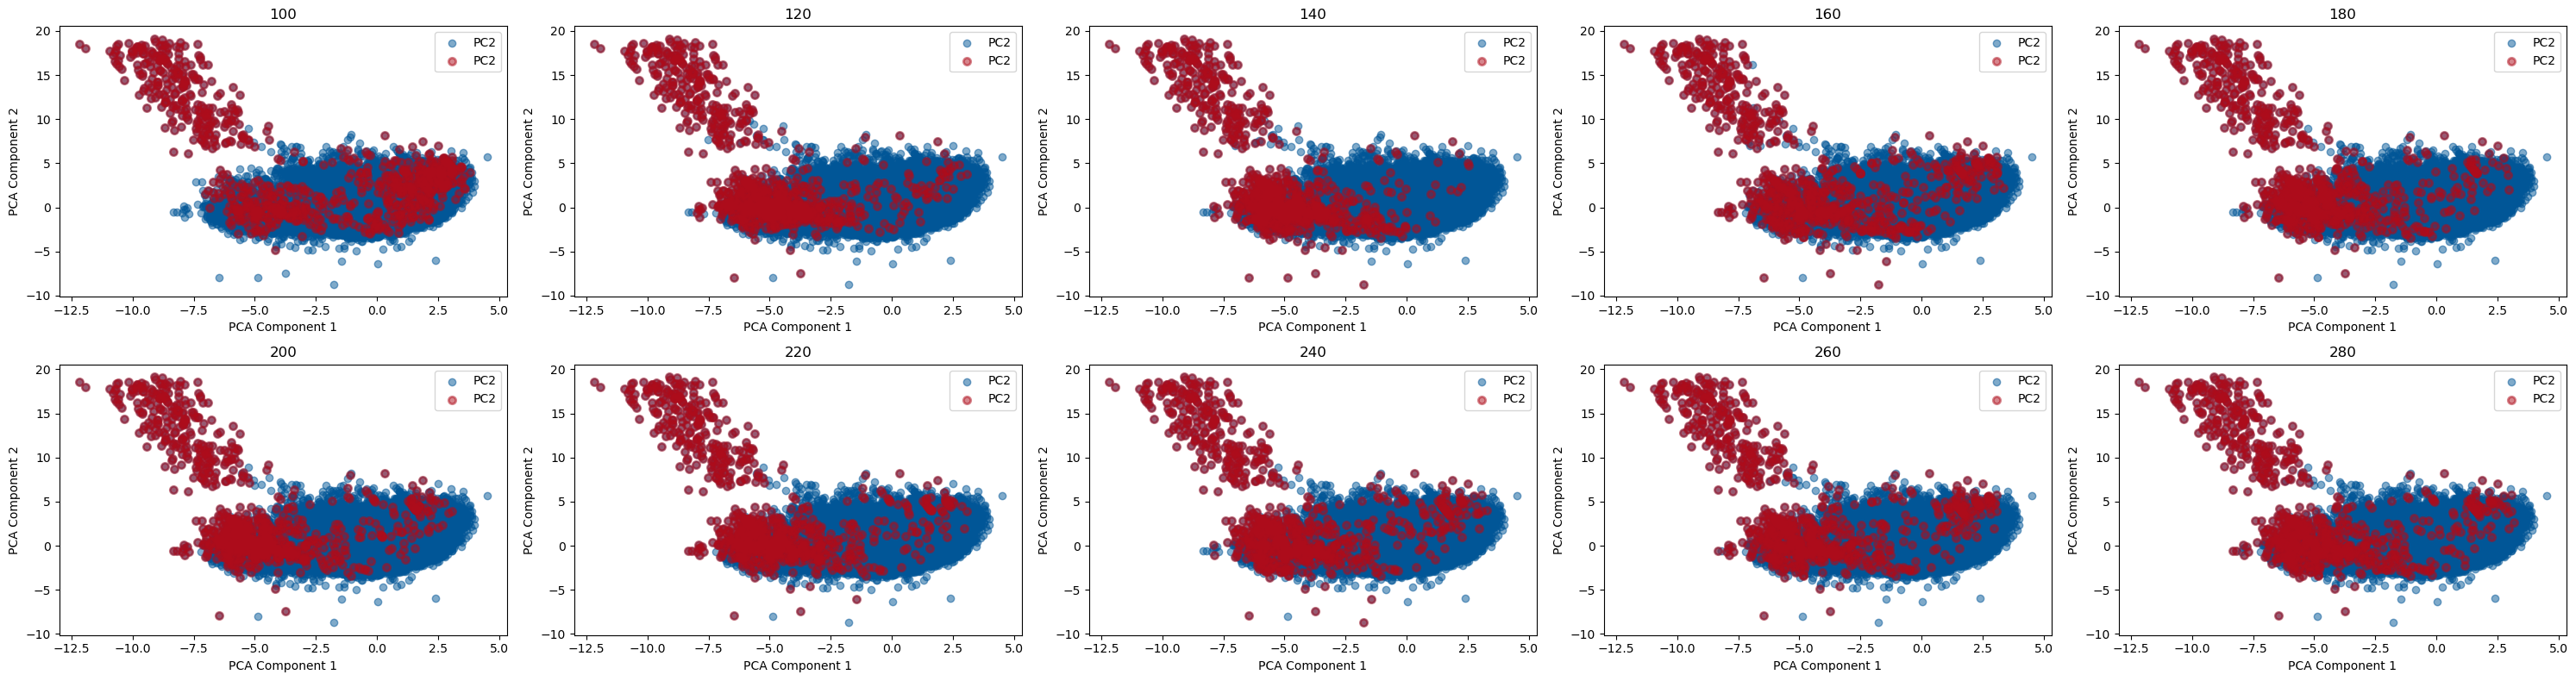

In [172]:
plot_outlier_lof(pca_data_f, y_preds_f, range(0, 10),  method='pca', rows=2, cols=5)

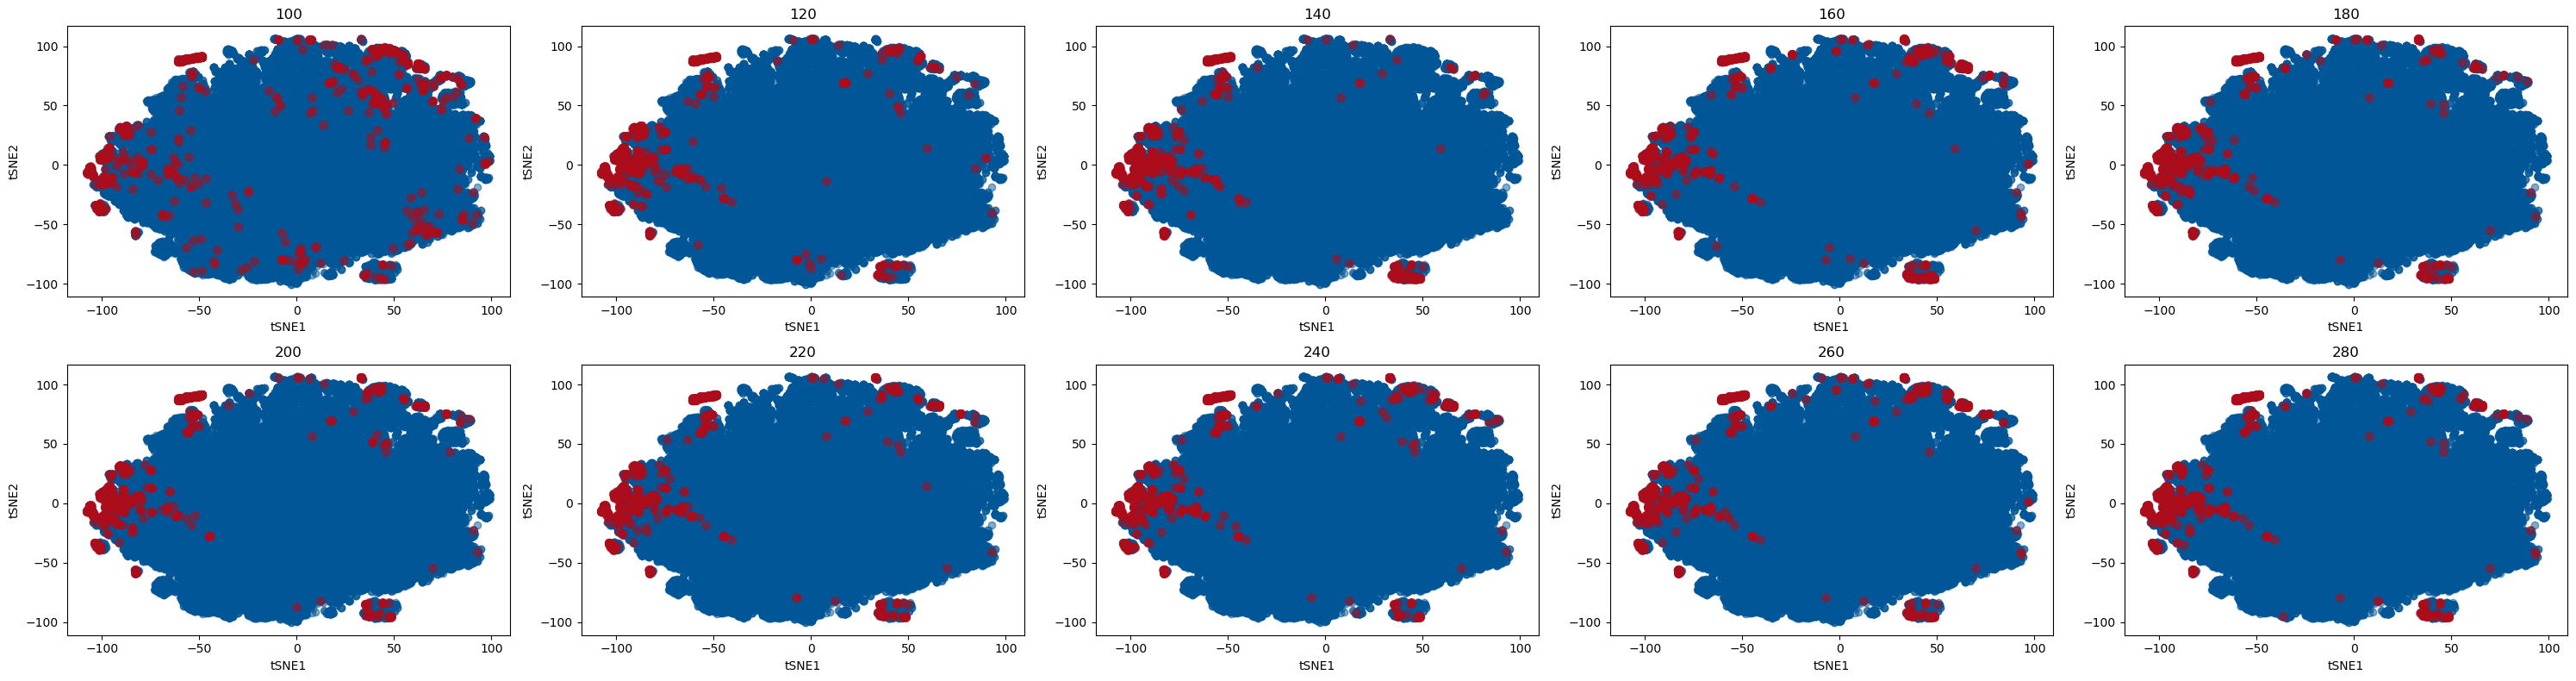

In [173]:
plot_outlier_lof(tsne_data_f, y_preds_f, range(0, 10),method='tsne', rows=2, cols=5)

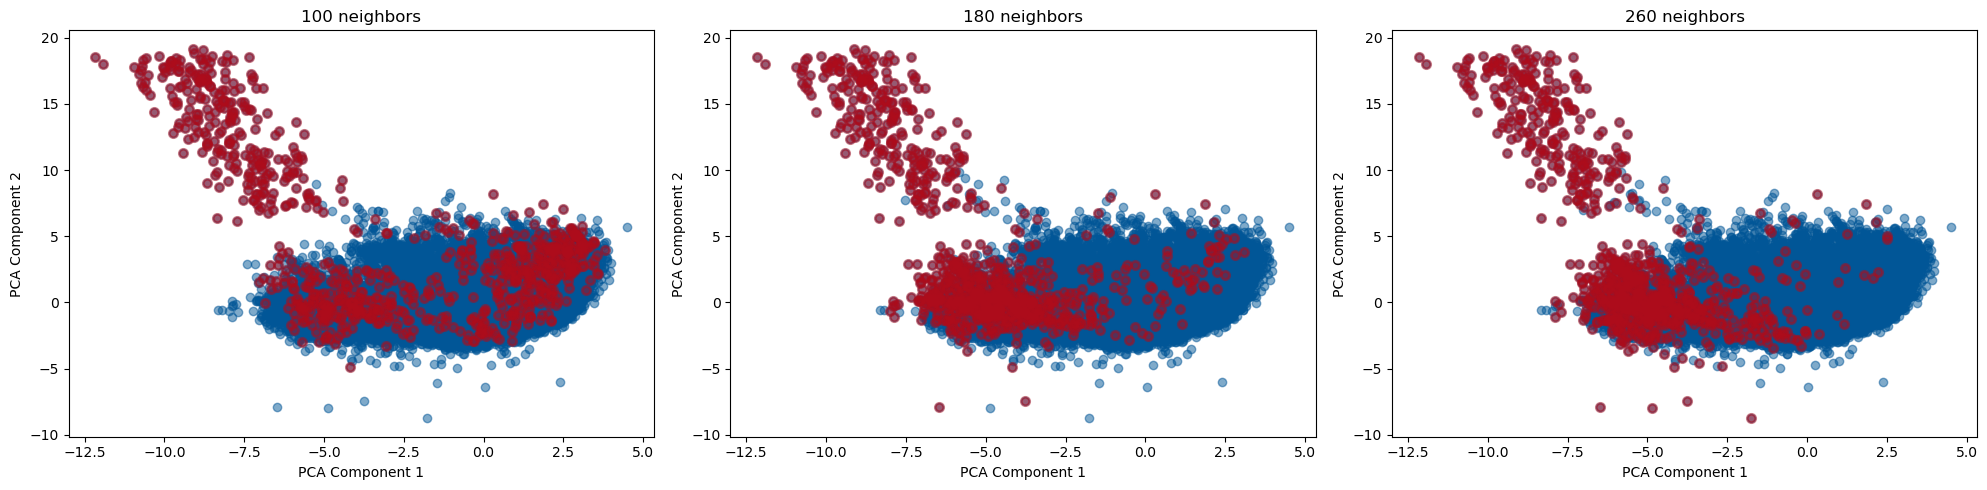

In [185]:
plot_outlier_lof(pca_data_f, y_preds_f, range(0, 12, 4),  method='pca', rows=1, cols=3, figsize=(20, 5))

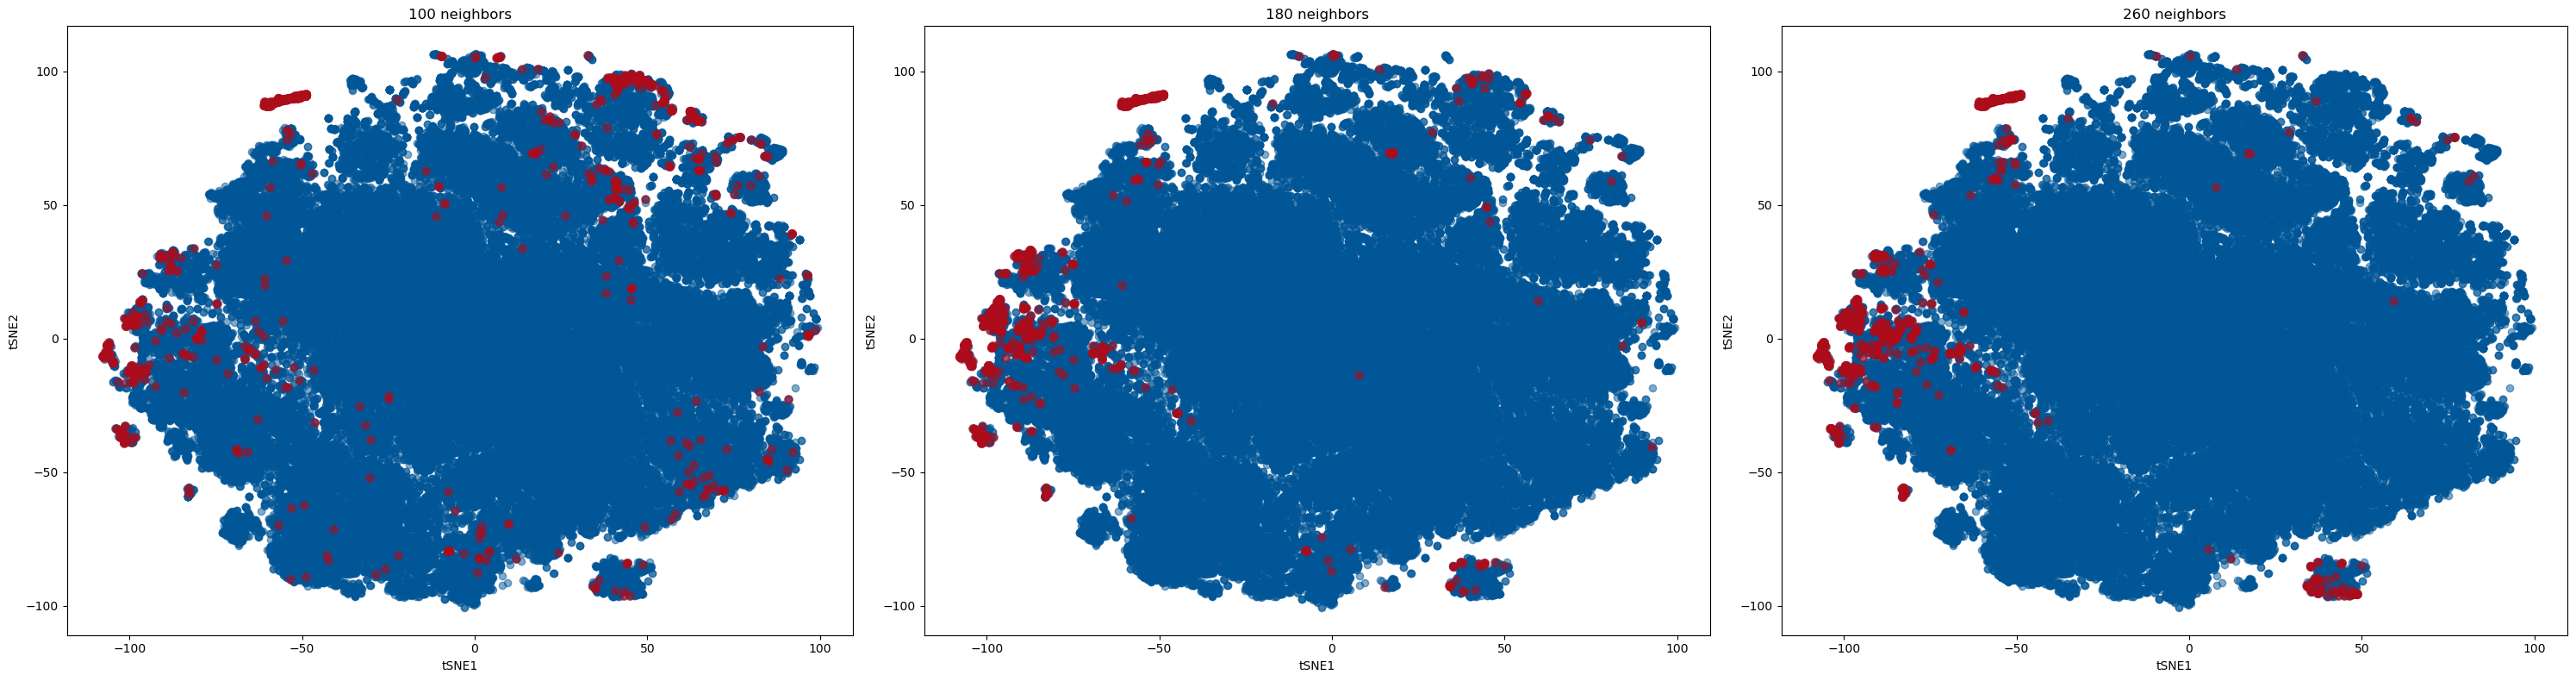

In [186]:
plot_outlier_lof(tsne_data_f, y_preds_f, range(0, 12, 4),  method='tsne', rows=1, cols=3)

## Isolation Forest

In [91]:
%%time

y_preds_if_f = []

for k in range(10, 500, 50):
    clf = IsolationForest(n_estimators=k, contamination=0.01)
    y_pred = clf.fit_predict(X_final)
    y_preds_if_f.append(y_pred)

CPU times: user 16.1 s, sys: 204 ms, total: 16.3 s
Wall time: 16.4 s


In [52]:
len(y_preds_if_f)
list(range(10, 500, 50))

10

[10, 60, 110, 160, 210, 260, 310, 360, 410, 460]

In [191]:
def plot_outlier_if(X, y_preds, ranges, method='pca', rows=1, cols=3, figsize=(30, 8)):
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, j in enumerate(ranges):
        if rows>1: ax = axes[i // cols, i % cols]
        else: ax = axes[i]  # Corrected from axs to axes

        X['outlier'] = pd.Categorical(y_preds_if_f[i])

      #  ax.scatter(pca_data_f['PC1'], pca_data_f['PC2'], alpha = 0.5, c=pca_data_f['outlier'], cmap=cmap)
        if method=='pca':

            ax.scatter(data=X, x='PC1', y='PC2', c='#015697', alpha=0.5)
            ax.scatter(data=X[X['outlier'] == -1], x='PC1', y='PC2', c='#ae0c1b', alpha=0.5, lw=2)


            ax.set_title(f'{10+50*j} estimators')
            ax.set_xlabel('PCA Component 1')
            ax.set_ylabel('PCA Component 2')
        else:
            ax.scatter(data=X, x='tSNE1', y='tSNE2', c='#015697', alpha=0.5)
            ax.scatter(data=X[X['outlier'] == -1], x='tSNE1', y='tSNE2', c='#ae0c1b', alpha=0.5, lw=2)
         #   ax.scatter(pca_data_f['PC1'], pca_data_f['PC2'], alpha = 0.5, c=y_preds[i], cmap=cmap)

          #  a.legend()
            ax.set_title(f'{10+50*j} estimators')
            ax.set_xlabel('tSNE1')
            ax.set_ylabel('tSNE2')

    plt.tight_layout()
    plt.show()

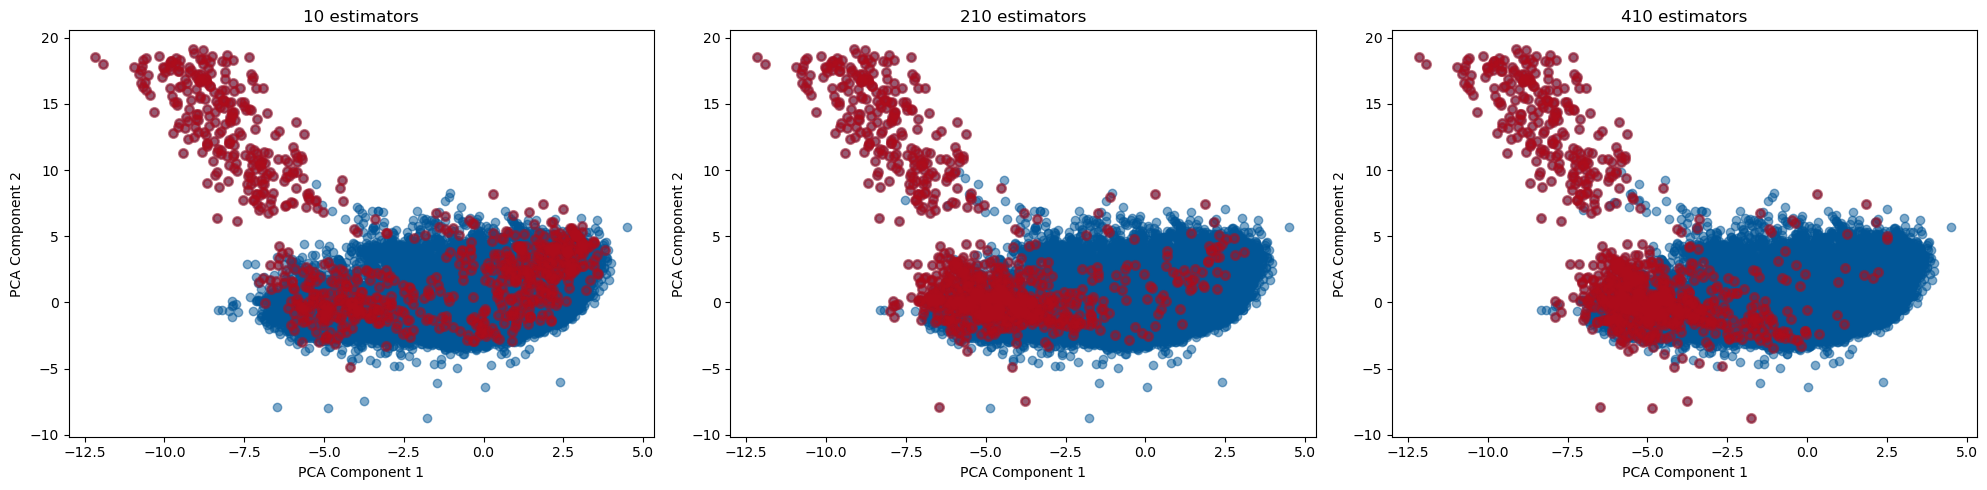

In [192]:
plot_outlier_if(pca_data_f, y_preds_if_f, range(0, 12, 4), method='pca', rows=1, cols=3, figsize=(20, 5))

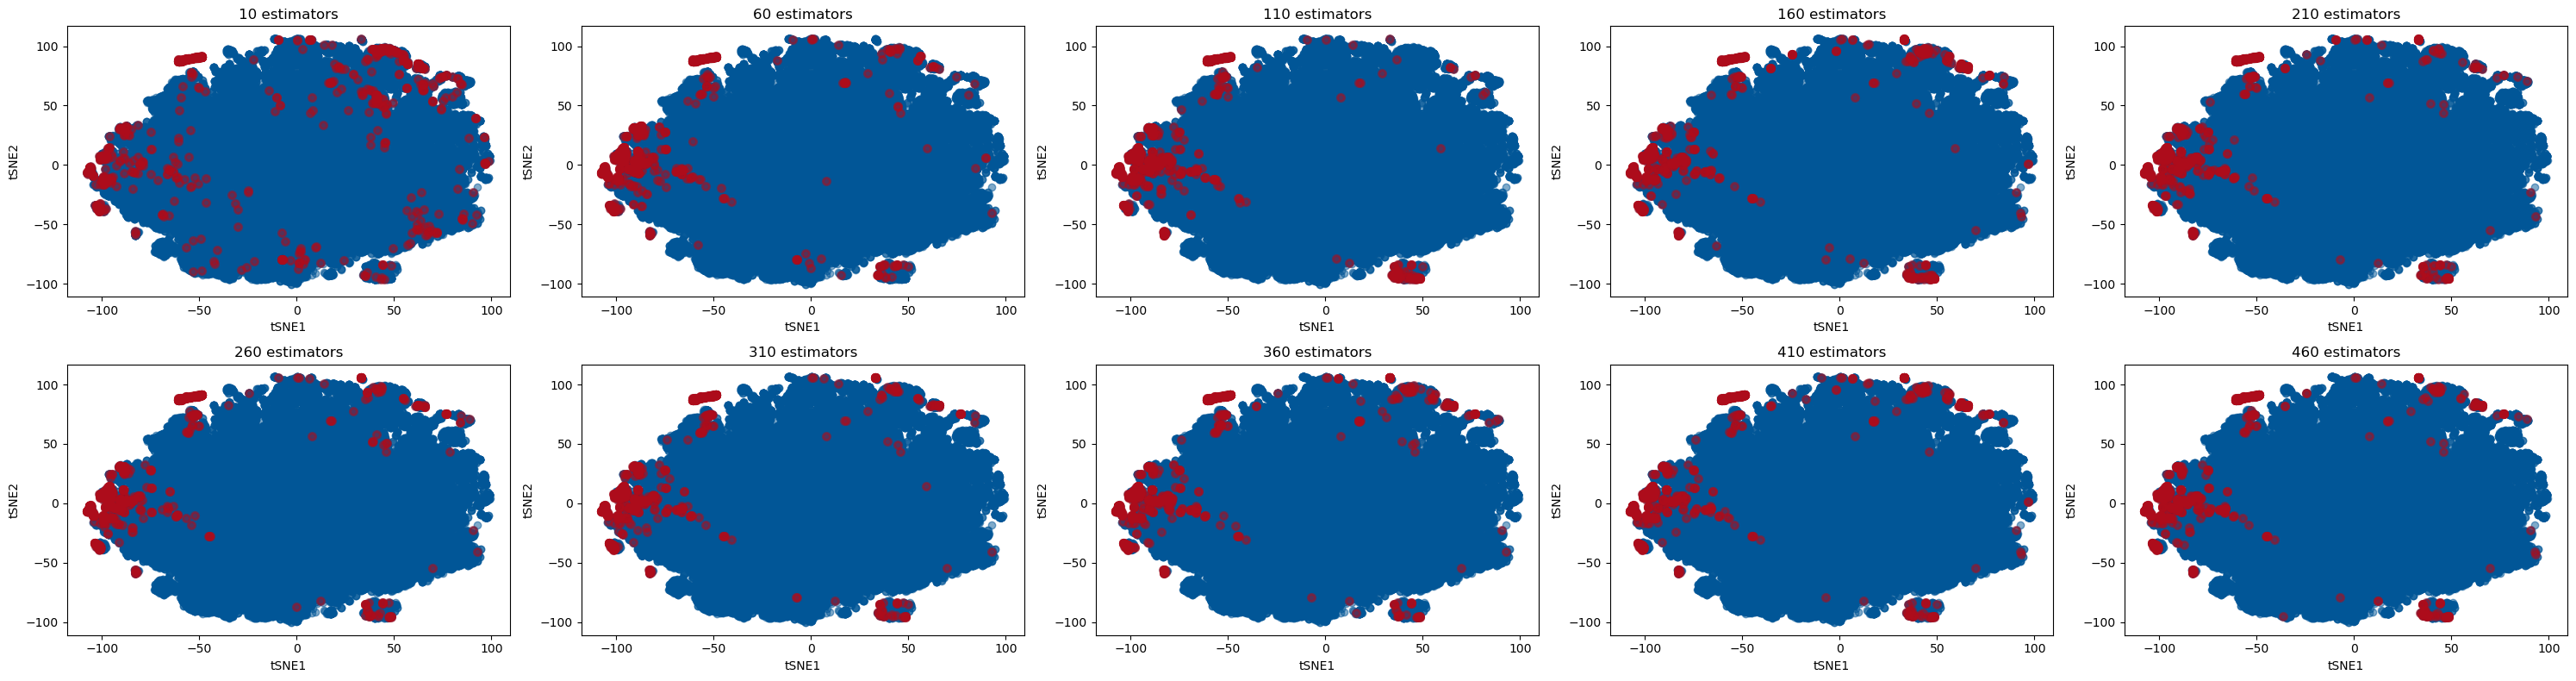

In [194]:
plot_outlier_if(tsne_data_f, y_preds_if_f, range(0, 10), method='tsne', rows=2, cols=5)

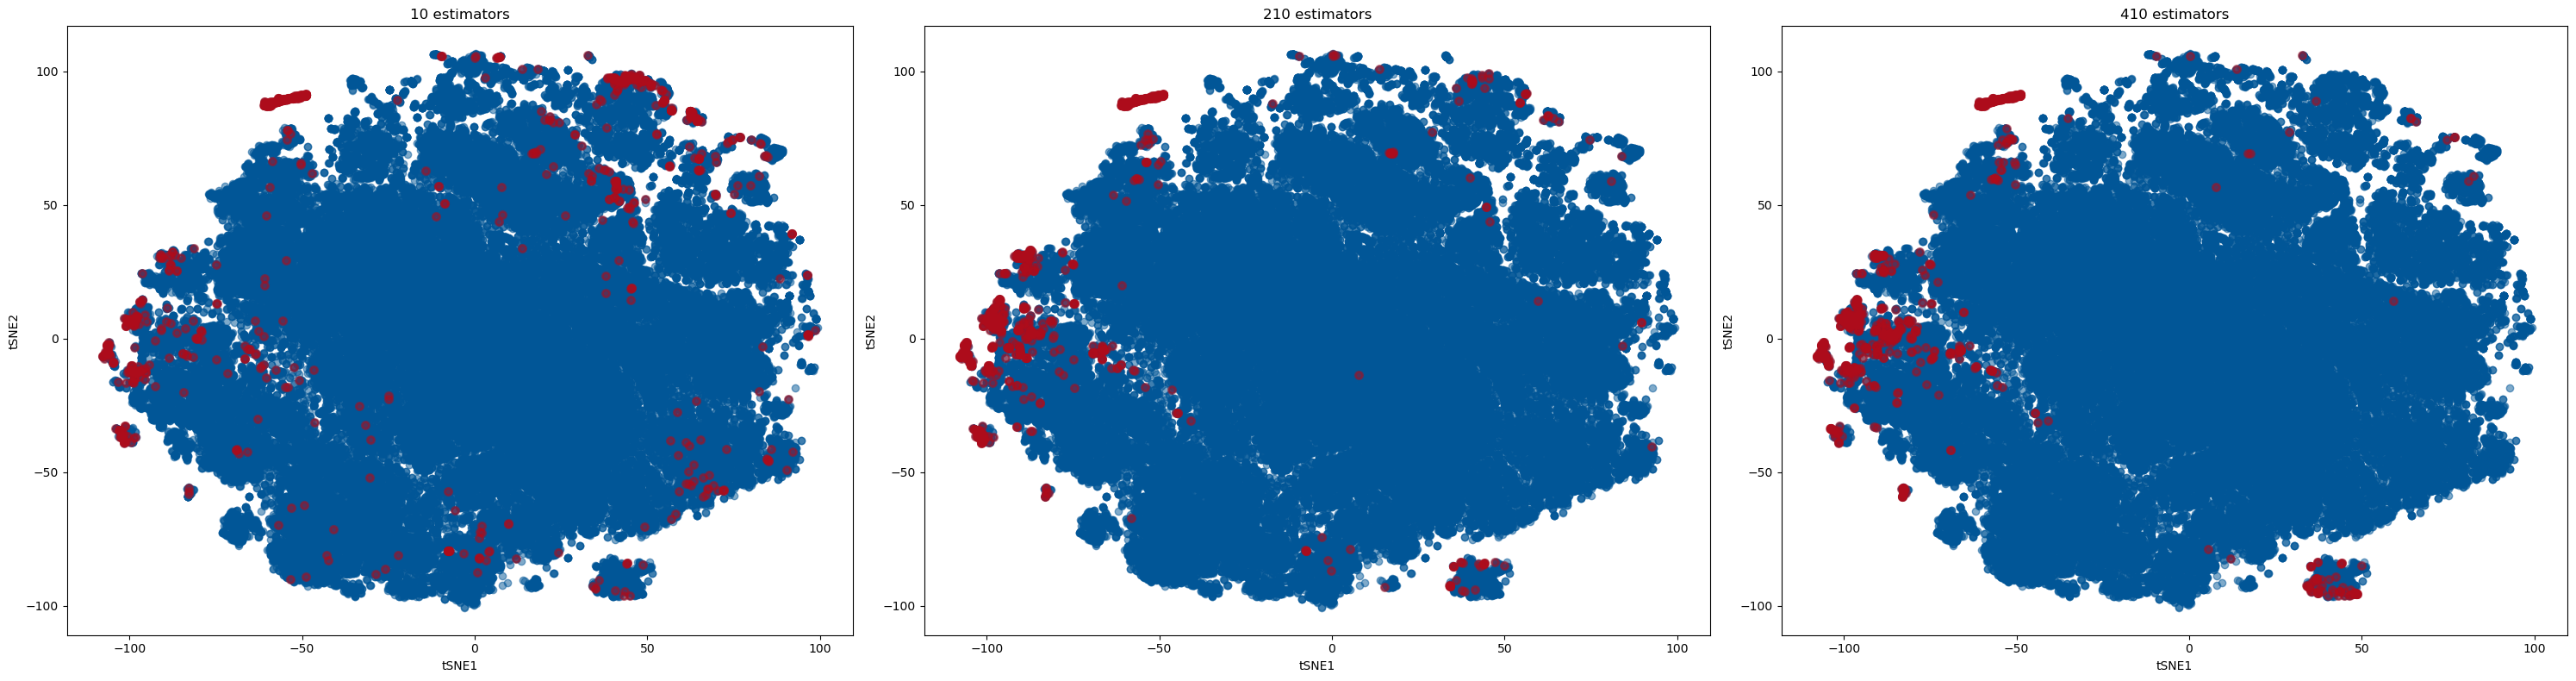

In [193]:
plot_outlier_if(tsne_data_f, y_preds_if_f, range(0, 12, 4), method='tsne', rows=1, cols=3)

####  Final

In [195]:
clf = LocalOutlierFactor(n_neighbors=260, contamination=0.01) # , novelty=True
y_pred_lof = clf.fit_predict(X_final)

In [18]:
clf = IsolationForest(n_estimators=210, contamination=0.01)
y_pred = clf.fit_predict(X_final)

In [197]:
pca_data_f['lof'] = pd.Categorical(y_pred_lof)
pca_data_f['if'] = pd.Categorical(y_pred)

In [ ]:
['#ae0c1b', '#015697']

In [198]:
tsne_data_f['lof'] = pd.Categorical(y_pred_lof)
tsne_data_f['if'] = pd.Categorical(y_pred)

<Figure size 2000x1000 with 0 Axes>

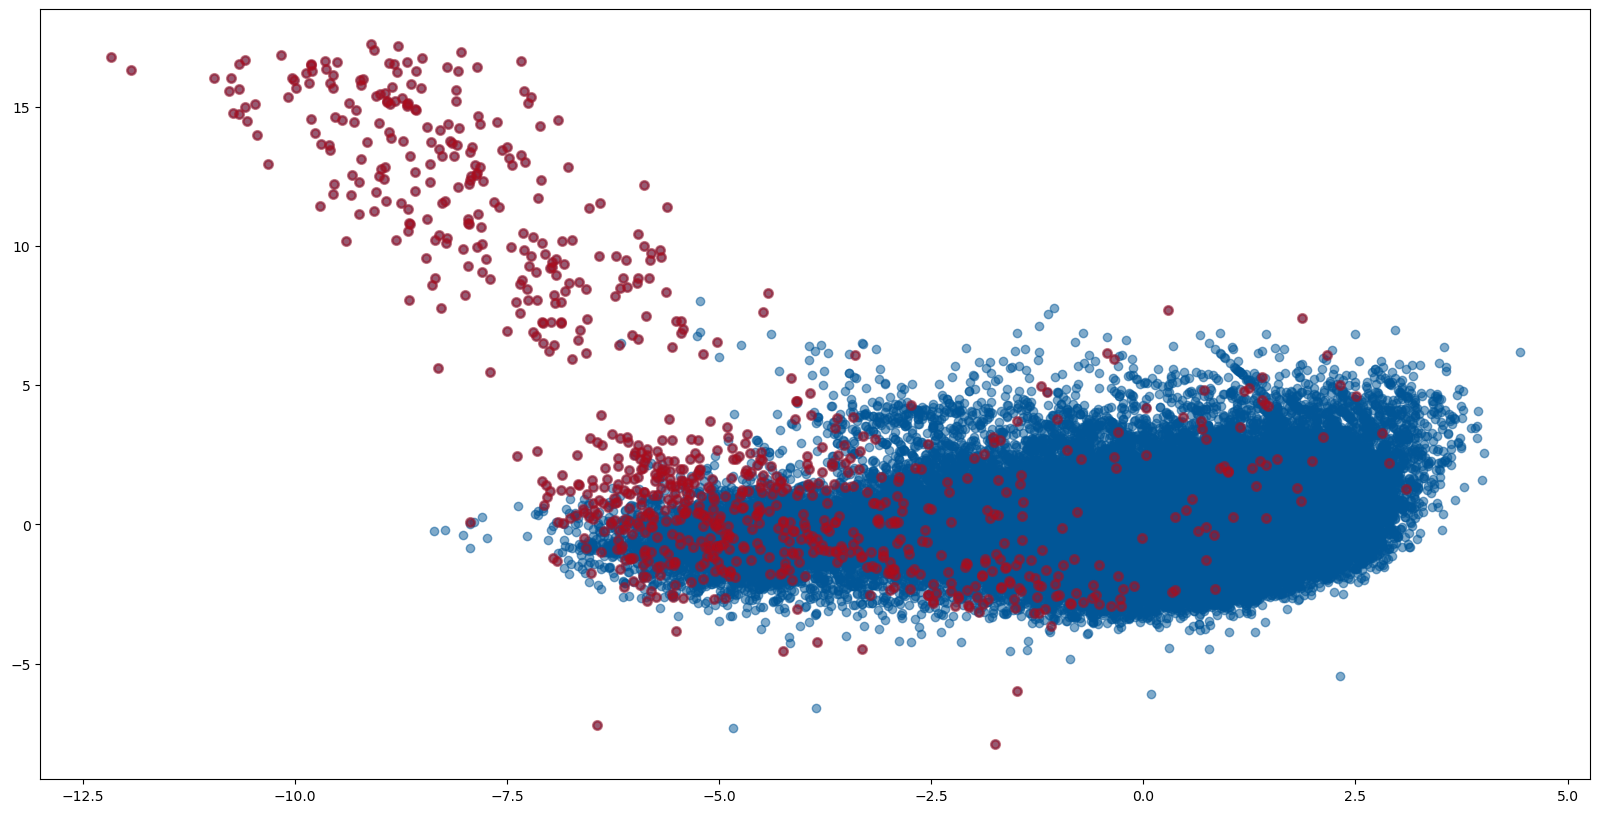

In [20]:
pca_data_f['if'] = pd.Categorical(y_pred)
plt.figure(figsize=(20, 10))
plt.scatter(data=pca_data_f, x='PC1', y='PC2', c='#015697', alpha=0.5)
plt.scatter(data=pca_data_f[pca_data_f['if'] == -1], x='PC1', y='PC2', c='#ae0c1b', alpha=0.5, lw=2)
plt.show()

<Figure size 2000x1000 with 0 Axes>

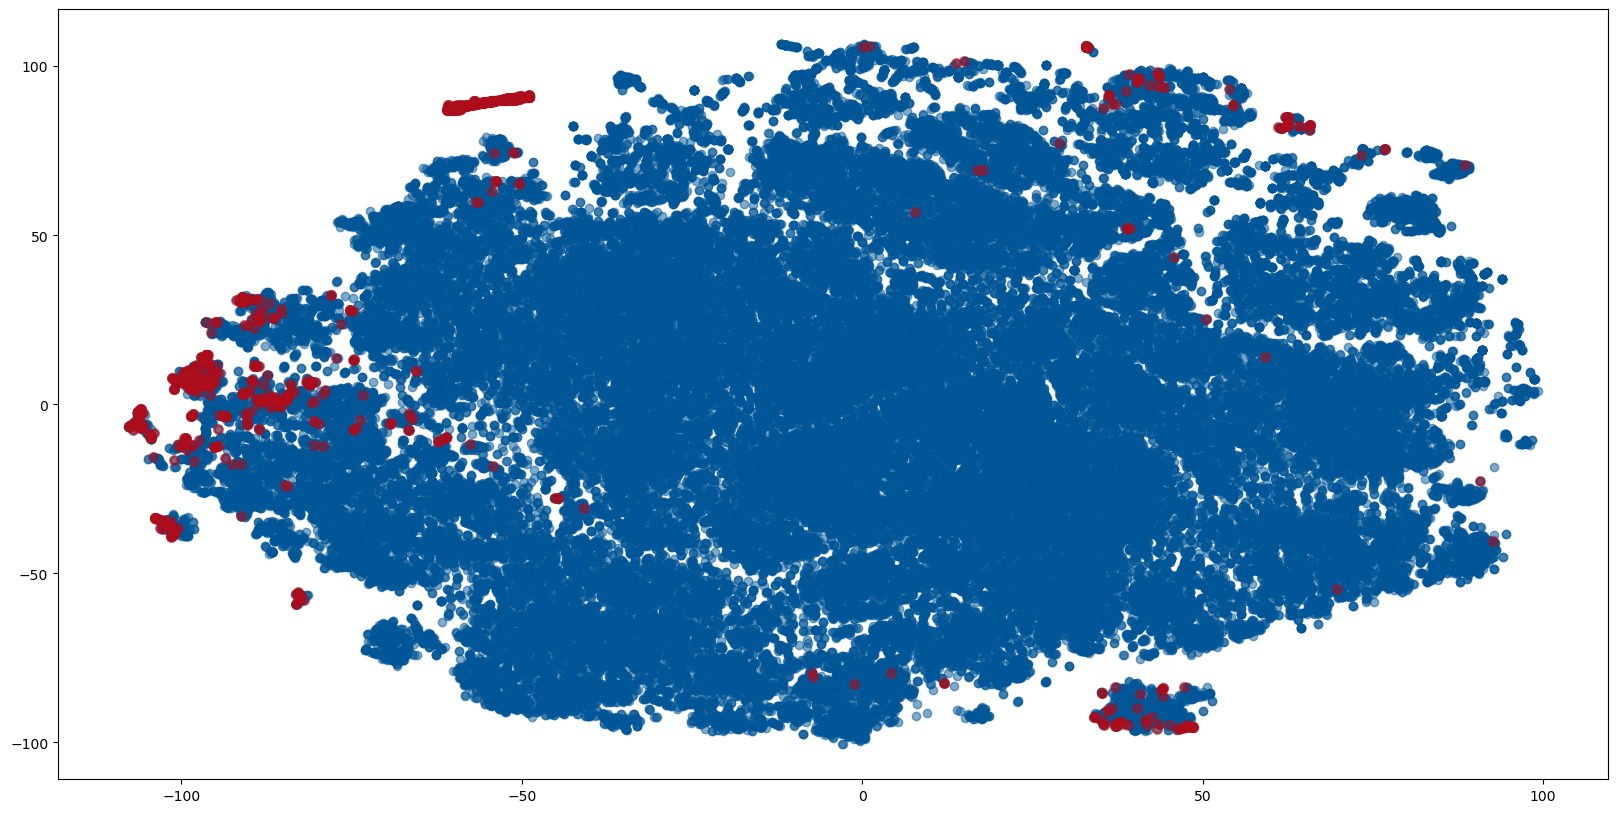

In [203]:
plt.figure(figsize=(20, 10))
plt.scatter(data=tsne_data_f, x='tSNE1', y='tSNE2', c='#015697', alpha=0.5)
plt.scatter(data=tsne_data_f[tsne_data_f['if'] == -1], x='tSNE1', y='tSNE2', c='#ae0c1b', alpha=0.5, lw=2)
plt.show()

Text(0.5, 1.0, 'Comparison via PCA')

Text(0.5, 1.0, 'Comparison via t-SNE')

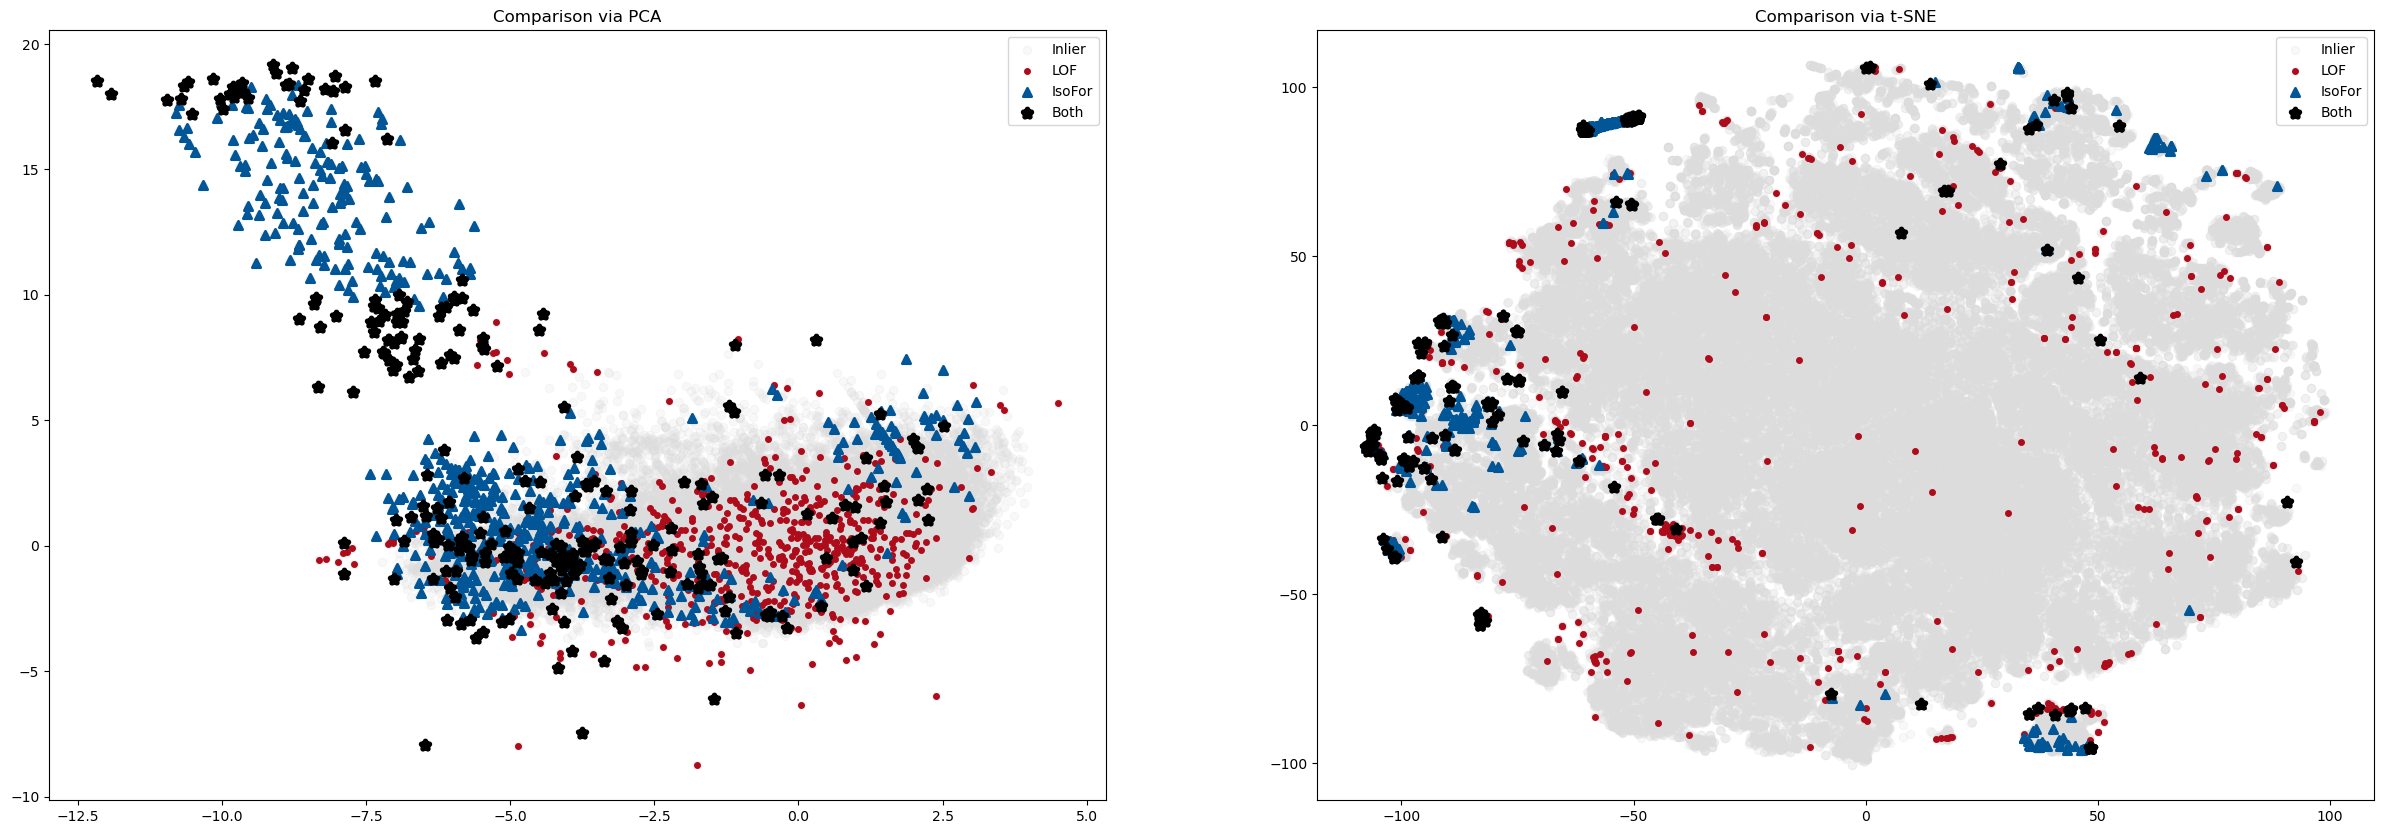

In [244]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

ax1 = axes[0]
ax1.scatter(data=pca_data_f, x='PC1', y='PC2', c='gainsboro', label='Inlier', alpha=0.2, lw=0.8)
ax1.scatter(data=pca_data_f[(pca_data_f['lof'] == -1) & (pca_data_f['if'] == 1)], x='PC1', y='PC2', c='#ae0c1b', marker='.', label='LOF', lw=2)
ax1.scatter(data=pca_data_f[(pca_data_f['lof'] == 1) & (pca_data_f['if'] == -1)], x='PC1', y='PC2', c='#015697', marker='^', label='IsoFor', lw=2)
ax1.scatter(data=pca_data_f[(pca_data_f['lof'] == -1) & (pca_data_f['if'] == -1)], x='PC1', y='PC2', c='black', marker='*', lw=4, label='Both')
ax1.legend()
ax1.set_title("Comparison via PCA")


ax2 = axes[1]
ax2.scatter(data=tsne_data_f, x='tSNE1', y='tSNE2', c='gainsboro', label='Inlier', alpha=0.2, lw=0.8)
ax2.scatter(data=tsne_data_f[(tsne_data_f['lof'] == -1) & (tsne_data_f['if'] == 1)], x='tSNE1', y='tSNE2', c='#ae0c1b', marker='.', label='LOF', lw=2)
ax2.scatter(data=tsne_data_f[(tsne_data_f['lof'] == 1) & (tsne_data_f['if'] == -1)], x='tSNE1', y='tSNE2', c='#015697', marker='^', label='IsoFor', lw=2)
ax2.scatter(data=tsne_data_f[(tsne_data_f['lof'] == -1) & (tsne_data_f['if'] == -1)], x='tSNE1', y='tSNE2', c='black', marker='*', lw=4, label='Both')
ax2.legend()
ax2.set_title("Comparison via t-SNE")


plt.show()


In [249]:
final_num['pop_cat'] = final_num['popularity_track'].apply(lambda x: int(x/10))
final_num['outlier_if'] = y_pred
final_num['outlier_lof'] = y_pred_lof
final_num

/var/folders/w8/zhd8pb895515_ncyccx0fwym0000gn/T/ipykernel_87424/3890420976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_num['pop_cat'] = final_num['popularity_track'].apply(lambda x: int(x/10))


track_number  album_total_tracks  danceability  energy  loudness  \
0                 1                   1         0.910   0.374    -9.844   
1                10                 100         0.269   0.516    -7.361   
2                 7                  16         0.495   0.891    -4.266   
3                41                 106         0.409   0.350    -8.025   
4                22                  23         0.609   0.947    -5.823   
...             ...                 ...           ...     ...       ...   
88147             1                   1         0.693   0.896    -4.114   
88148            10                  24         0.712   0.976    -7.570   
88149            22                  31         0.759   0.843    -3.718   
88150             9                  10         0.529   0.704    -2.691   
88151             1                   7         0.766   0.382   -11.464   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.1990      0.075700           0.00301     0.154    0.432   
1           0.0366      0.406000           0.00000     0.117    0.341   
2           0.0383      0.000186           0.00000     0.475    0.735   
3           0.0275      0.750000           0.00000     0.114    0.126   
4           0.2340      0.038900           0.00000     0.956    0.177   
...            ...           ...               ...       ...      ...   
88147       0.0682      0.310000           0.00000     0.195    0.854   
88148       0.0964      0.005040           0.95700     0.225    0.101   
88149       0.0913      0.127000           0.00000     0.114    0.560   
88150       0.0411      0.004860           0.00000     0.646    0.267   
88151       0.0324      0.698000           0.00143     0.157    0.672   

         tempo  tempo_confidence  mode_confidence  num_genres_track  \
0      104.042             0.578            0.583                 1   
1      178.174             0.030            0.717                 1   
2      155.075             0.233            0.452                 1   
3      139.876             0.250            0.693                 1   
4      105.012             0.803            0.124                 1   
...        ...               ...              ...               ...   
88147  126.995             0.883            0.894                 1   
88148  121.988             0.822            0.447                 1   
88149  105.016             0.659            0.676                 4   
88150  124.228             0.492            0.482                 1   
88151  119.992             0.736            0.547                 1   

       duration_min  album_release_year  num_artists  popularity_art  \
0          2.678750                2022            1       45.000000   
1          5.382217                2021            1       67.000000   
2          2.988000                2012            1       67.000000   
3          5.113100                2014            1       67.000000   
4          2.577100                2011            1       67.000000   
...             ...                 ...          ...             ...   
88147      5.031483                2017            3       71.333333   
88148     11.032533                2017            2       18.500000   
88149      4.394433                2022            2       84.000000   
88150      3.109783                2017            2       54.500000   
88151      5.419267                2014            2       63.500000   

          followers  num_genres_art  popularity_track  pop_cat  outlier_if  \
0      1.682600e+04        0.000000              35.0        3           1   
1      1.517867e+06        2.000000              49.0        4           1   
2      1.517867e+06        2.000000              48.0        4           1   
3      1.517867e+06        2.000000              35.0        3           1   
4      1.517867e+06        2.000000              21.0        2           1   
...             ...             ...        

In [265]:
final_num['genre'] = df_final['genre']

In [277]:
outlier_lof = final_num[final_num["outlier_lof"]==-1]
outlier_if = final_num[final_num["outlier_if"]==-1]

In [278]:
outlier_lof.columns

Index(['track_number', 'album_total_tracks', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'tempo_confidence', 'mode_confidence',
       'num_genres_track', 'duration_min', 'album_release_year', 'num_artists',
       'popularity_art', 'followers', 'num_genres_art', 'popularity_track',
       'pop_cat', 'outlier_if', 'outlier_lof', 'genre'],
      dtype='object')

In [285]:
outliers = pd.DataFrame(outlier_if['pop_cat'].value_counts())

In [301]:
outliers=outliers.rename(columns={'pop_cat': 'Isolation Forest'})

In [294]:
outliers['LOF'] =outlier_lof['pop_cat'].value_counts()

In [302]:
outliers

Isolation Forest  LOF
0               626  305
2                71  125
3                69  124
1                36   85
4                27   82
6                22   57
7                16   21
5                14   76
8                 1    7

In [273]:
outlier_lof = outlier_lof[cols]
outlier_if = outlier_if[cols]

<AxesSubplot:xlabel='pop_cat'>

Text(0.5, 0, 'Popularity Category')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Stacked Bar Chart for Isolation Forest and LOF')

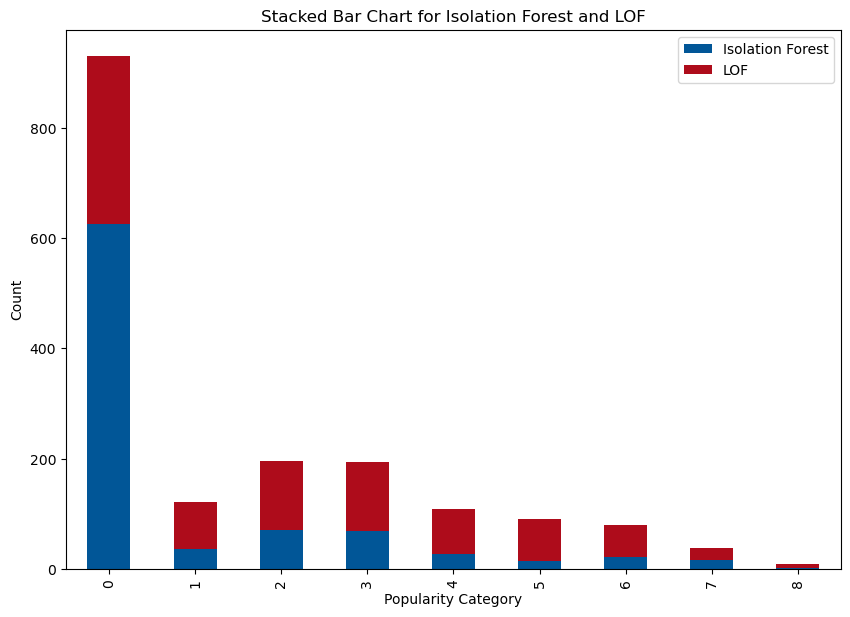

In [303]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    'pop_cat': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'Isolation Forest': [626, 36, 71, 69, 27, 14, 22, 16, 1],
    'LOF': [305, 85, 125, 124, 82, 76, 57, 21, 7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot stacked bar chart
df.set_index('pop_cat').plot(kind='bar', stacked=True, figsize=(10, 7), color=['#015697', '#ae0c1b'])

# Add labels and title
plt.xlabel('Popularity Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart for Isolation Forest and LOF')

# Show plot
plt.show()





In [306]:
df_pivot

pop_cat             0   1    2    3   4   5   6   7  8
Method                                                
Isolation Forest  626  36   71   69  27  14  22  16  1
LOF               305  85  125  124  82  76  57  21  7

In [310]:
colors

[(0.6823529411764706, 0.047058823529411764, 0.10588235294117647, 1.0),
 (0.6848442906574395, 0.05453287197231834, 0.11289504036908882, 1.0),
 (0.6873356401384083, 0.06200692041522491, 0.11990772779700115, 1.0),
 (0.6898269896193772, 0.06948096885813149, 0.12692041522491349, 1.0),
 (0.692318339100346, 0.07695501730103806, 0.13393310265282585, 1.0),
 (0.6948096885813149, 0.08442906574394463, 0.14094579008073818, 1.0),
 (0.6973010380622837, 0.09190311418685121, 0.14795847750865052, 1.0),
 (0.6997923875432526, 0.09937716262975778, 0.15497116493656288, 1.0),
 (0.7022837370242214, 0.10685121107266435, 0.1619838523644752, 1.0),
 (0.7047750865051903, 0.11432525951557093, 0.16899653979238755, 1.0),
 (0.7072664359861592, 0.1217993079584775, 0.17600922722029988, 1.0),
 (0.7097577854671281, 0.12927335640138407, 0.18302191464821221, 1.0),
 (0.7122491349480969, 0.13674740484429065, 0.19003460207612458, 1.0),
 (0.7147404844290658, 0.1442214532871972, 0.1970472895040369, 1.0),
 (0.7172318339100346, 0.

In [312]:
len(df_pivot.columns)

9

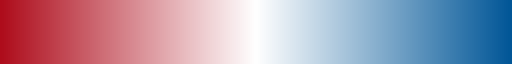

In [313]:
cmap_rwb

In [317]:
len([colors[i] for i in range(0, 256, 30)])


9

<AxesSubplot:xlabel='Method'>

(array([0, 1]), [Text(0, 0, 'Isolation Forest'), Text(1, 0, 'LOF')])

Text(0.5, 1.0, 'Isolation Forest vs. LOF')

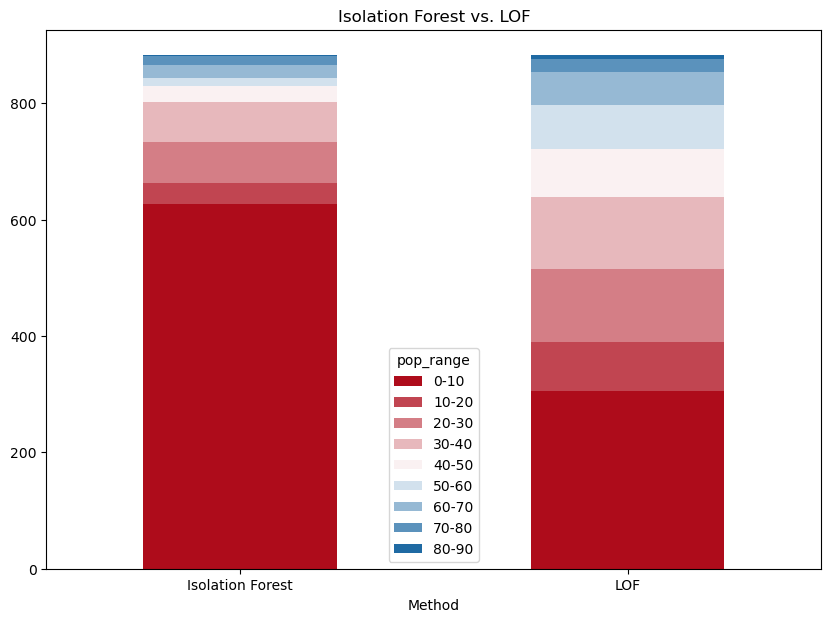

In [319]:
data = {
    'pop_range': ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"],
    'Isolation Forest': [626, 36, 71, 69, 27, 14, 22, 16, 1],
    'LOF': [305, 85, 125, 124, 82, 76, 57, 21, 7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Reshape data to stack by popularity category
df_melt = df.melt(id_vars='pop_range', var_name='Method', value_name='Count')

# Pivot the data for stacking
df_pivot = df_melt.pivot(index='Method', columns='pop_range', values='Count')

# Convert the colormap to a list of colors
colors = [cmap_rwb(i/256) for i in range(256)]
colors = [colors[i] for i in range(0, 256, 30)]

# Plot stacked bar chart with two bars (one for Isolation Forest and one for LOF)
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors[:len(df_pivot.columns)])

# Add labels and title

plt.xticks(rotation=0)
plt.title('Isolation Forest vs. LOF')

# Show plot
plt.show()


# Outlier dropping

In [323]:
df_final['outlier_lof'] = final_num['outlier_lof']
df_final['outlier_if'] = final_num['outlier_if']

In [324]:
no_outlier_lof = df_final[df_final['outlier_lof'] == 1]

In [327]:
final_num = final_num.drop(columns=['genre', 'pop_cat'])

In [328]:
no_outlier_lof = final_num[final_num['outlier_lof'] == 1]

In [353]:
no_outlier_if = final_num[final_num['outlier_if'] == 1]

In [330]:
no_outlier_lof['popularity_track'] = no_outlier_lof['popularity_track'].apply(lambda x: 0 if x < 30 else 1)

/var/folders/w8/zhd8pb895515_ncyccx0fwym0000gn/T/ipykernel_87424/2906919150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_lof['popularity_track'] = no_outlier_lof['popularity_track'].apply(lambda x: 0 if x < 30 else 1)


In [354]:
no_outlier_if['popularity_track'] = no_outlier_if['popularity_track'].apply(lambda x: 0 if x < 30 else 1)

/var/folders/w8/zhd8pb895515_ncyccx0fwym0000gn/T/ipykernel_87424/1337945015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_if['popularity_track'] = no_outlier_if['popularity_track'].apply(lambda x: 0 if x < 30 else 1)


In [349]:
X = final_num.drop(columns=['outlier_if', 'outlier_lof', 'popularity_track'])  # Features
y = final_num['popularity_track'].apply(lambda x: 0 if x<30 else 1)

In [345]:
X = std_scl(X)

In [350]:
y

0        1
1        1
2        1
3        1
4        0
        ..
88147    1
88148    0
88149    0
88150    1
88151    1
Name: popularity_track, Length: 88152, dtype: int64

In [351]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming final_num is your DataFrame and 'no_outlier_if' is the column to predict
# Also, assume that 'pop_cat' or other feature columns are used to make predictions

              # Target (labels)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=20)  # Default k=5, you can tune this

# Step 4: Fit the model to the training data
knn.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=20)

Accuracy: 72.26%
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      8444
           1       0.75      0.69      0.72      9187

    accuracy                           0.72     17631
   macro avg       0.72      0.72      0.72     17631
weighted avg       0.73      0.72      0.72     17631



In [358]:
X = no_outlier_if.drop(columns=['outlier_if', 'outlier_lof', 'popularity_track'])  # Features
y = no_outlier_if['popularity_track']

X = std_scl(X)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming final_num is your DataFrame and 'no_outlier_if' is the column to predict
# Also, assume that 'pop_cat' or other feature columns are used to make predictions

              # Target (labels)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=20)  # Default k=5, you can tune this

# Step 4: Fit the model to the training data
knn.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=20)

Accuracy: 78.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      8266
           1       0.78      0.82      0.80      9188

    accuracy                           0.79     17454
   macro avg       0.79      0.78      0.78     17454
weighted avg       0.79      0.79      0.78     17454



In [360]:
X = no_outlier_lof.drop(columns=['outlier_if', 'outlier_lof', 'popularity_track'])  # Features
y = no_outlier_lof['popularity_track']

X = std_scl(X)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming final_num is your DataFrame and 'no_outlier_if' is the column to predict
# Also, assume that 'pop_cat' or other feature columns are used to make predictions

              # Target (labels)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=20)  # Default k=5, you can tune this

# Step 4: Fit the model to the training data
knn.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=20)

Accuracy: 77.28%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      8461
           1       0.76      0.82      0.79      8993

    accuracy                           0.77     17454
   macro avg       0.77      0.77      0.77     17454
weighted avg       0.77      0.77      0.77     17454



In [377]:
no_outlier_both = final_num[(final_num['outlier_if'] == 1) | (final_num['outlier_lof'] == 1)]

In [378]:
no_outlier_both['popularity_track'] = no_outlier_both['popularity_track'].apply(lambda x: 0 if x < 30 else 1)

/var/folders/w8/zhd8pb895515_ncyccx0fwym0000gn/T/ipykernel_87424/1737363174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_both['popularity_track'] = no_outlier_both['popularity_track'].apply(lambda x: 0 if x < 30 else 1)


In [379]:
no_outlier_both.shape

(87894, 23)

In [380]:
X = no_outlier_both.drop(columns=['outlier_if', 'outlier_lof', 'popularity_track'])  # Features
y = no_outlier_both['popularity_track']

X = std_scl(X)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming final_num is your DataFrame and 'no_outlier_if' is the column to predict
# Also, assume that 'pop_cat' or other feature columns are used to make predictions

              # Target (labels)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=20)  # Default k=5, you can tune this

# Step 4: Fit the model to the training data
knn.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=20)

Accuracy: 77.30%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      8606
           1       0.75      0.83      0.79      8973

    accuracy                           0.77     17579
   macro avg       0.78      0.77      0.77     17579
weighted avg       0.78      0.77      0.77     17579



In [383]:
no_outlier_either = final_num[(final_num['outlier_if'] == 1) & (final_num['outlier_lof'] == 1)]

In [385]:
no_outlier_either['popularity_track'] = no_outlier_either['popularity_track'].apply(lambda x: 0 if x < 30 else 1)

/var/folders/w8/zhd8pb895515_ncyccx0fwym0000gn/T/ipykernel_87424/2873569220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier_either['popularity_track'] = no_outlier_either['popularity_track'].apply(lambda x: 0 if x < 30 else 1)


In [386]:
no_outlier_either.shape

(86646, 23)

In [387]:
X = no_outlier_either.drop(columns=['outlier_if', 'outlier_lof', 'popularity_track'])  # Features
y = no_outlier_either['popularity_track']

X = std_scl(X)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming final_num is your DataFrame and 'no_outlier_if' is the column to predict
# Also, assume that 'pop_cat' or other feature columns are used to make predictions

              # Target (labels)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=20)  # Default k=5, you can tune this

# Step 4: Fit the model to the training data
knn.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNeighborsClassifier(n_neighbors=20)

Accuracy: 78.17%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      8358
           1       0.77      0.83      0.80      8972

    accuracy                           0.78     17330
   macro avg       0.78      0.78      0.78     17330
weighted avg       0.78      0.78      0.78     17330



In [390]:
df_final = df_final[df_final["outlier_if"] == 1]

In [404]:
df = pd.read_csv('merged.csv')

In [407]:
df_final.columns

Index(['track_number', 'album_type', 'album_total_tracks', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'tempo_confidence', 'mode_confidence',
       'num_genres_track', 'genre', 'duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art',
       'popularity_track'],
      dtype='object')

In [411]:
df.columns

Index(['id', 'name', 'disc_number', 'explicit', 'popularity_track',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'start_of_fade_out',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_beats', 'n_bars', 'genres', 'num_genres_track',
       'genre', 'duration_min', 'features_duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art'],
      dtype='object')

In [ ]:
cat = ['album_type','genre']

In [412]:
strs = ''
for n in df_final.columns:
    strs += ', '+ n

In [413]:
strs

', track_number, album_type, album_total_tracks, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, tempo_confidence, mode_confidence, num_genres_track, genre, duration_min, album_release_year, num_artists, popularity_art, followers, num_genres_art, popularity_track'

In [394]:
df_final = df_final.drop(columns=['outlier_if', 'outlier_lof', 'pop_cat'])
df_final.shape

(87270, 39)